In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix
!pip install openpyxl
!pip install statsmodels

In [ ]:
data = pd.read_excel('Jade Inc. Data set..xlsx')

In [ ]:
print(data)

      CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0 

In [ ]:
print(data.head())

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

In [ ]:
#Removed CustomerID as it was not relevant

data = data.drop('CustomerID', axis = 1)

In [ ]:
print(data.dtypes)

Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object


In [ ]:
print(f'Number of rows: {len(data)}')

Number of rows: 5630


In [ ]:
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].astype('category')

In [ ]:
print("Updated data types:\n", data.dtypes)

Updated data types:
 Churn                             int64
Tenure                          float64
PreferredLoginDevice           category
CityTier                          int64
WarehouseToHome                 float64
PreferredPaymentMode           category
Gender                         category
HourSpendOnApp                  float64
NumberOfDeviceRegistered          int64
PreferedOrderCat               category
SatisfactionScore                 int64
MaritalStatus                  category
NumberOfAddress                   int64
Complain                          int64
OrderAmountHikeFromlastYear     float64
CouponUsed                      float64
OrderCount                      float64
DaySinceLastOrder               float64
CashbackAmount                  float64
dtype: object


In [ ]:
data['Churn'] = data['Churn'].astype('category')

In [ ]:
data['Complain'] = data['Complain'].astype('category')

In [ ]:
print(data.dtypes)

Churn                          category
Tenure                          float64
PreferredLoginDevice           category
CityTier                          int64
WarehouseToHome                 float64
PreferredPaymentMode           category
Gender                         category
HourSpendOnApp                  float64
NumberOfDeviceRegistered          int64
PreferedOrderCat               category
SatisfactionScore                 int64
MaritalStatus                  category
NumberOfAddress                   int64
Complain                       category
OrderAmountHikeFromlastYear     float64
CouponUsed                      float64
OrderCount                      float64
DaySinceLastOrder               float64
CashbackAmount                  float64
dtype: object


#Data Description

In [ ]:
desc_stats = data.describe()
desc_stats

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,15.707922,1.751023,3.008004,4.543491,177.223030
std,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
print(data.isnull().sum())

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


##Replacing Missing values with the median##

In [ ]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())

In [ ]:
print(data.isnull().sum())

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


##Exploratory Data Analysis##

In [ ]:
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 558


In [ ]:
data = data.drop_duplicates()

#1. Outlier Detection

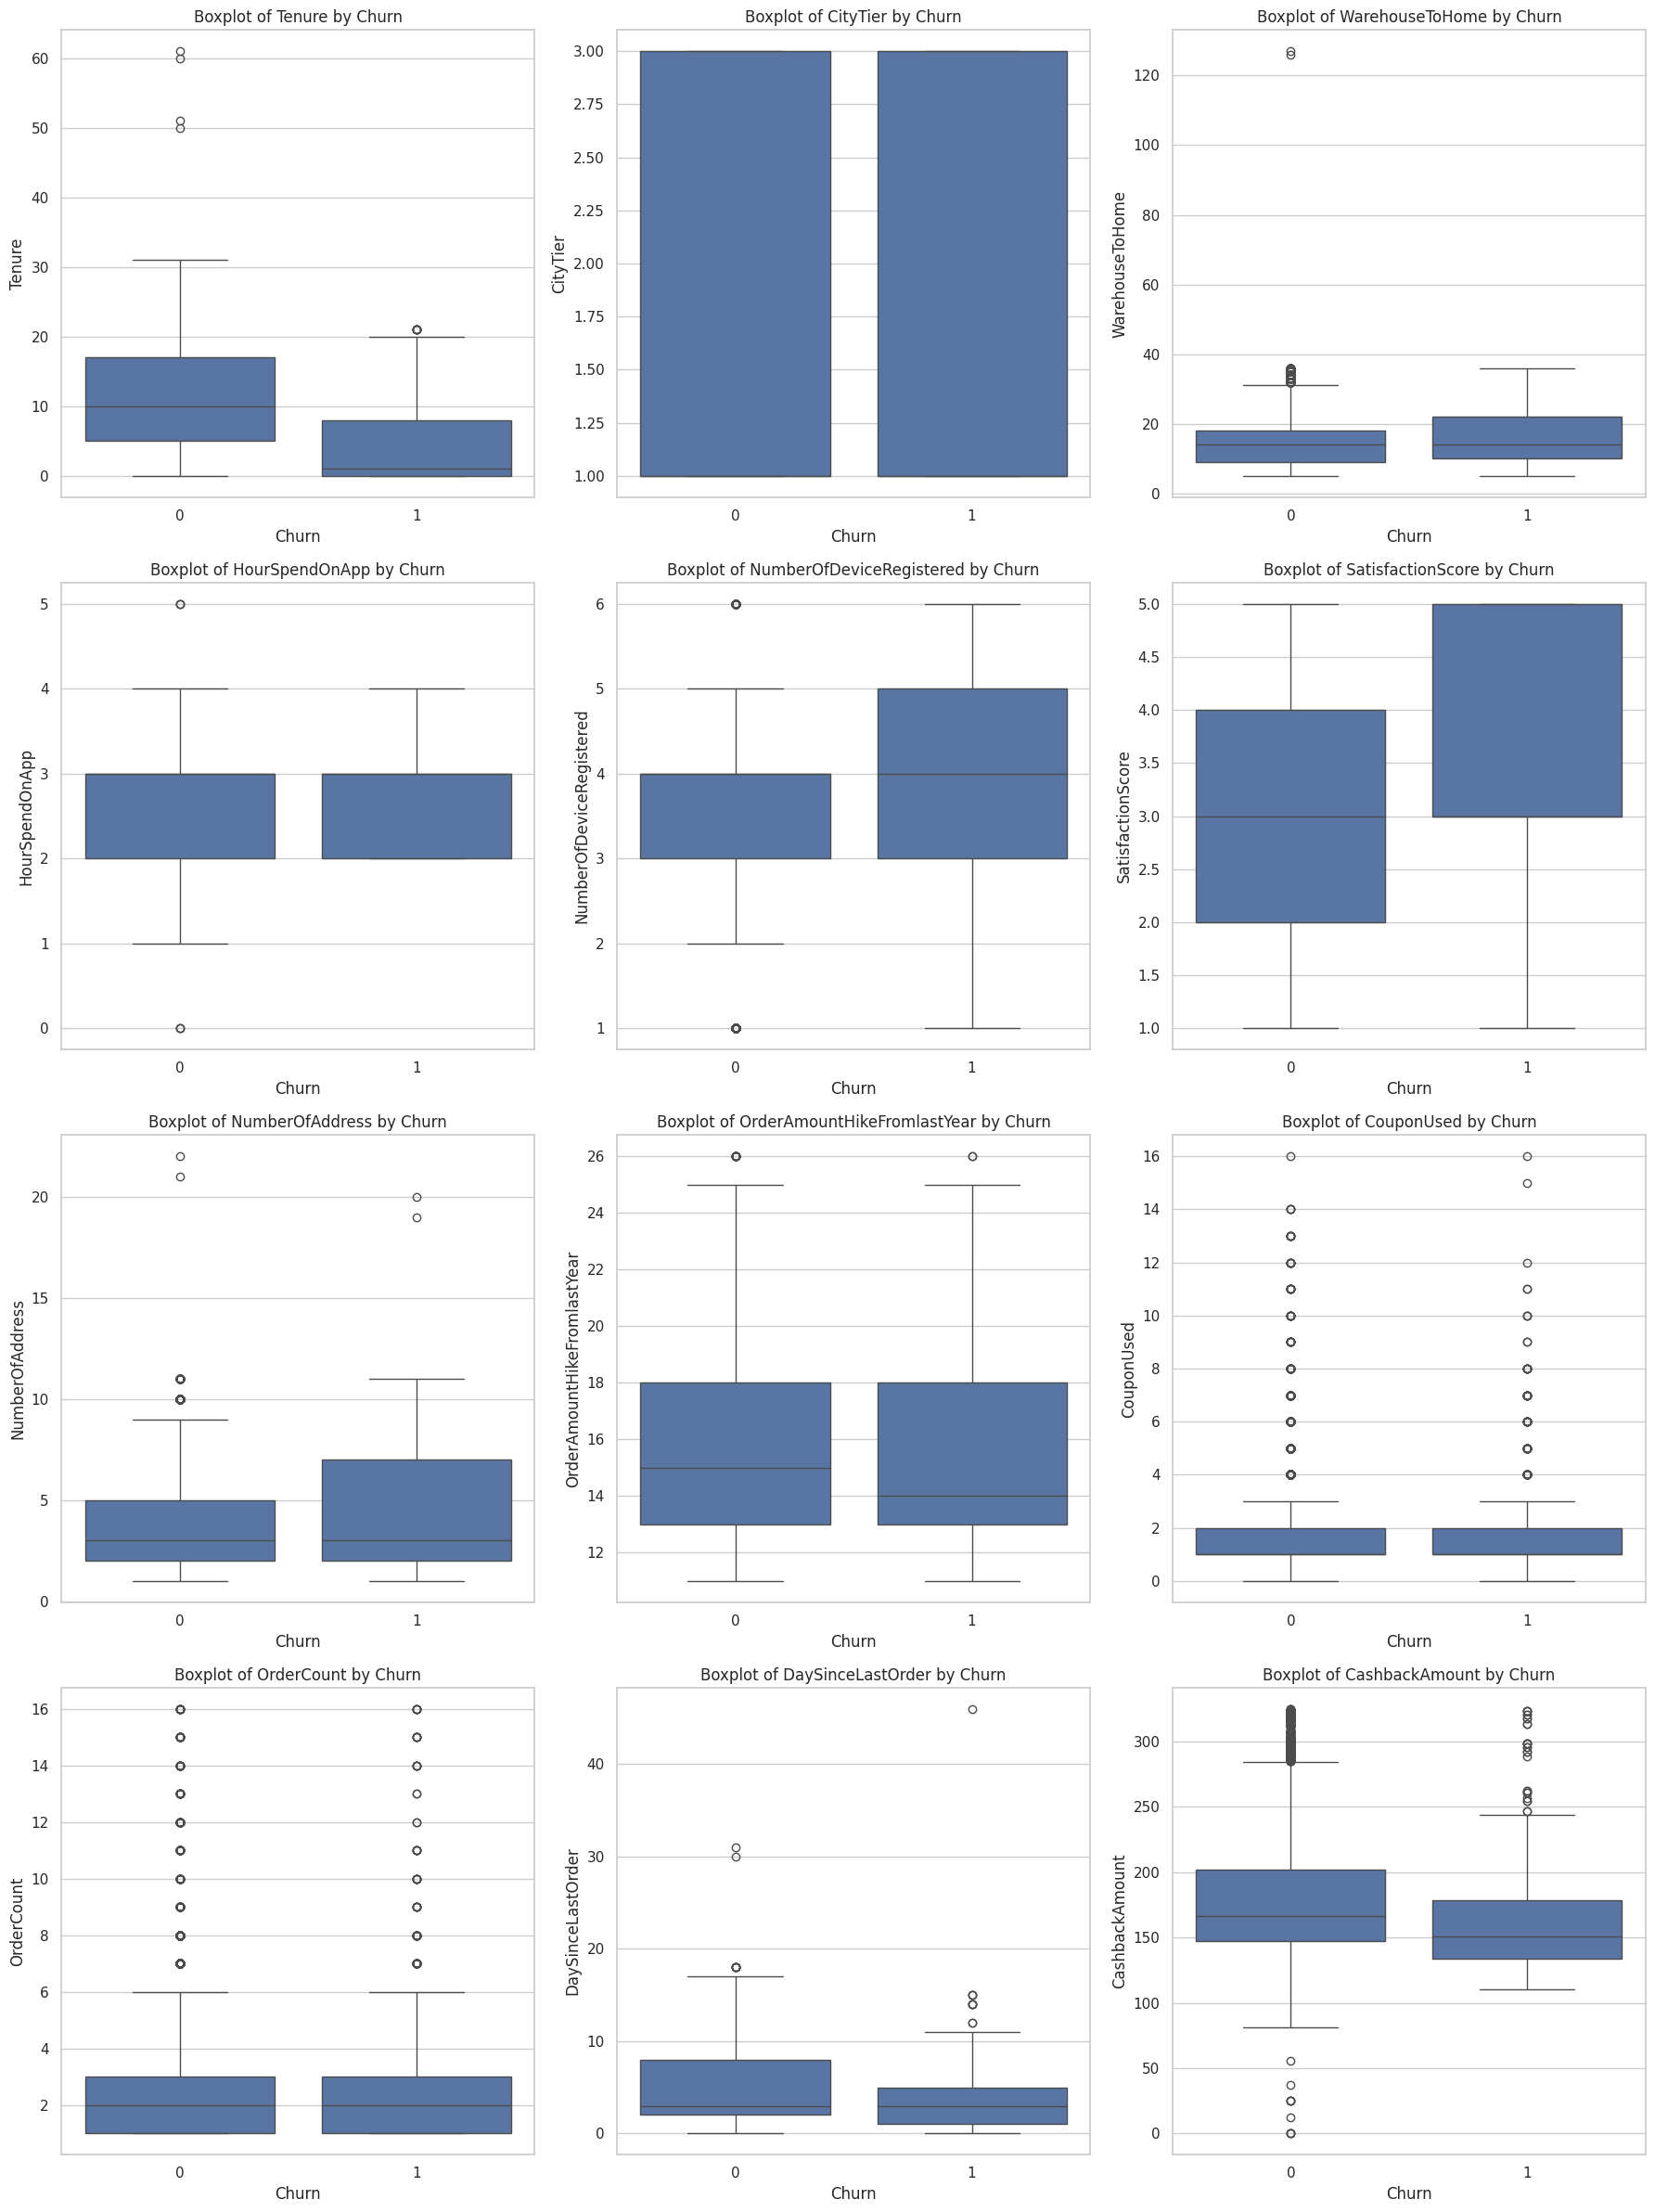

In [ ]:
sns.set(style="whitegrid")

# Select the numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows and columns for the grid
n_cols = 3
n_rows = (len(numeric_cols) - 1) // n_cols + 1  # Excluding 'Churn'

# Create subplots for the numeric columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 6*n_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each numeric column and create a boxplot
for i, col in enumerate(numeric_cols):
    if col != 'Churn':  # Skip 'Churn' column
        sns.boxplot(ax=axes[i], x='Churn', y=col, data=data)
        axes[i].set_title(f'Boxplot of {col} by Churn')
    else:
        # Hide unused subplot areas if any
        axes[i].axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

numerical_vars = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize a dictionary to store summary
outlier_summary = {}

# Compute Z-scores and detect outliers
for var in numerical_vars:
    # Compute Z-scores directly and identify outliers
    z_scores = stats.zscore(data[var])
    outliers = data[abs(z_scores) > 3]

    # Store the summary in the dictionary
    outlier_summary[var] = {
        'Total Outliers': outliers.shape[0],
        'Outliers Index': outliers.index.tolist()
    }

# Convert the summary to a DataFrame for easier viewing
outlier_summary_df = pd.DataFrame(outlier_summary).T
outlier_summary_df.columns = ['Total Outliers', 'Outliers Index']

# Display the summary
print("Z-Score Outlier Detection Summary:")
print(outlier_summary_df)

Z-Score Outlier Detection Summary:
                            Total Outliers  \
Tenure                                   4   
CityTier                                 0   
WarehouseToHome                          2   
HourSpendOnApp                           3   
NumberOfDeviceRegistered                 0   
SatisfactionScore                        0   
NumberOfAddress                          4   
OrderAmountHikeFromlastYear              0   
CouponUsed                             105   
OrderCount                             165   
DaySinceLastOrder                       40   
CashbackAmount                           9   

                                                                Outliers Index  
Tenure                                                 [928, 2719, 3743, 5534]  
CityTier                                                                    []  
WarehouseToHome                                                   [1309, 4124]  
HourSpendOnApp                            

High Outlier Counts: Variables like CouponUsed, OrderCount, and DaySinceLastOrder have a significant number of outliers.

Low or No Outliers: Variables such as CityTier, NumberOfDeviceRegistered, and SatisfactionScore have no outliers.

Consistency: Variables and their Z-score counterparts show consistent outlier detection results.

#2. Removing Outliers (Cap and Floor)

In [ ]:
# Define a function to remove outliers based on IQR and summarize the output
def cap_variables(df, numerical_vars):
    for var in numerical_vars:
        var_capped = f"{var}_Capped"
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[var_capped] = df[var].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

def summarize_outliers_removal(df, numerical_vars):
    summary = []
    for var in numerical_vars:
        var_capped = f"{var}_Capped"
        # Calculate bounds (not needed, as we've already capped the variables)
        # ...

        # Count rows before and after outlier removal (not applicable, as we've already removed outliers)
        # ...

        # Append summary
        summary.append({
            'Variable': var_capped,
            'Count': df[var_capped].count(),
            'Min': df[var_capped].min(),
            'Max': df[var_capped].max(),
            'Mean': df[var_capped].mean(),
            'Std': df[var_capped].std()
        })

    # Convert summary to DataFrame and display
    summary_df = pd.DataFrame(summary)
    print(summary_df)

# Apply the capping function to the dataframe
data_capped = cap_variables(data, numerical_vars)

# Apply the outlier removal function to the capped dataframe
summarize_outliers_removal(data_capped, numerical_vars)

                              Variable  Count       Min        Max  \
0                        Tenure_Capped   5072   0.00000   33.00000   
1                      CityTier_Capped   5072   1.00000    3.00000   
2               WarehouseToHome_Capped   5072   5.00000   34.00000   
3                HourSpendOnApp_Capped   5072   0.50000    4.50000   
4      NumberOfDeviceRegistered_Capped   5072   1.50000    5.50000   
5             SatisfactionScore_Capped   5072   1.00000    5.00000   
6               NumberOfAddress_Capped   5072   1.00000   12.00000   
7   OrderAmountHikeFromlastYear_Capped   5072  11.00000   25.50000   
8                    CouponUsed_Capped   5072   0.00000    3.50000   
9                    OrderCount_Capped   5072   1.00000    6.00000   
10            DaySinceLastOrder_Capped   5072   0.00000   14.50000   
11               CashbackAmount_Capped   5072  68.19875  275.42875   

          Mean        Std  
0    10.137224   8.321608  
1     1.658715   0.919372  
2    

I implemented capping and flooring to mitigate the influence of extreme outliers on our analysis. By setting a maximum and minimum threshold for our data, I aimed to reduce the impact of these extreme values, ensuring they don't disproportionately affect our statistical measures and model performance while still retaining the data points within a reasonable range. This approach helps maintain the integrity of the dataset and improves the robustness of our analyses and predictions.

In [ ]:
numerical_vars = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize a dictionary to store summary
outlier_summary = {}

# Compute Z-scores and detect outliers
for var in numerical_vars:
    # Compute Z-scores directly and identify outliers
    z_scores = stats.zscore(data[var])
    outliers = data[abs(z_scores) > 3]

    # Store the summary in the dictionary
    outlier_summary[var] = {
        'Total Outliers': outliers.shape[0],
        'Outliers Index': outliers.index.tolist()
    }

# Convert the summary to a DataFrame for easier viewing
outlier_summary_df = pd.DataFrame(outlier_summary).T
outlier_summary_df.columns = ['Total Outliers', 'Outliers Index']

# Display the summary
print("Z-Score Outlier Detection Summary:")
print(outlier_summary_df)

Z-Score Outlier Detection Summary:
                                   Total Outliers  \
Tenure                                          4   
CityTier                                        0   
WarehouseToHome                                 2   
HourSpendOnApp                                  3   
NumberOfDeviceRegistered                        0   
SatisfactionScore                               0   
NumberOfAddress                                 4   
OrderAmountHikeFromlastYear                     0   
CouponUsed                                    105   
OrderCount                                    165   
DaySinceLastOrder                              40   
CashbackAmount                                  9   
Tenure_Capped                                   0   
CityTier_Capped                                 0   
WarehouseToHome_Capped                          0   
HourSpendOnApp_Capped                           3   
NumberOfDeviceRegistered_Capped                 0   
Satisfactio

In [ ]:
data

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,...,WarehouseToHome_Capped,HourSpendOnApp_Capped,NumberOfDeviceRegistered_Capped,SatisfactionScore_Capped,NumberOfAddress_Capped,OrderAmountHikeFromlastYear_Capped,CouponUsed_Capped,OrderCount_Capped,DaySinceLastOrder_Capped,CashbackAmount_Capped
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,...,6.0,3.0,3.0,2,9.0,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,...,8.0,3.0,4.0,3,7.0,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,...,30.0,2.0,4.0,3,6.0,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,...,15.0,2.0,4.0,5,8.0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,...,12.0,3.0,3.0,5,3.0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623,0,5.0,Computer,1,12.0,Credit Card,Male,4.0,4,Laptop & Accessory,...,12.0,4.0,4.0,5,2.0,20.0,2.0,2.0,3.0,224.36
5624,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,...,12.0,2.0,5.0,3,2.0,19.0,2.0,2.0,1.0,154.66
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,...,13.0,3.0,5.0,5,6.0,16.0,1.0,2.0,3.0,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,...,11.0,3.0,2.0,4,3.0,21.0,1.0,2.0,4.0,186.42


In [ ]:
data.describe()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,WarehouseToHome_Capped,HourSpendOnApp_Capped,NumberOfDeviceRegistered_Capped,SatisfactionScore_Capped,NumberOfAddress_Capped,OrderAmountHikeFromlastYear_Capped,CouponUsed_Capped,OrderCount_Capped,DaySinceLastOrder_Capped,CashbackAmount_Capped
count,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,...,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000
mean,10.154968,1.658715,15.474763,2.932571,3.685923,3.027603,4.194992,15.676853,1.772871,3.041798,...,15.402405,2.932571,3.692922,3.027603,4.188289,15.673994,1.472003,2.576104,4.459286,175.891226
std,8.395215,0.919372,8.412609,0.707307,1.029699,1.384631,2.579142,3.591203,1.913138,2.932325,...,8.040885,0.705423,0.946871,1.384631,2.547408,3.583172,1.087162,1.738053,3.435157,44.594913
min,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,11.000000,0.000000,1.000000,...,5.000000,0.500000,1.500000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,68.198750
25%,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,13.000000,1.000000,1.000000,...,9.000000,2.000000,3.000000,2.000000,2.000000,13.000000,1.000000,1.000000,2.000000,145.910000
50%,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,15.000000,1.000000,2.000000,...,14.000000,3.000000,4.000000,3.000000,3.000000,15.000000,1.000000,2.000000,3.000000,163.855000
75%,15.000000,3.000000,19.000000,3.000000,4.000000,4.000000,6.000000,18.000000,2.000000,3.000000,...,19.000000,3.000000,4.000000,4.000000,6.000000,18.000000,2.000000,3.000000,7.000000,197.717500
max,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,26.000000,16.000000,16.000000,...,34.000000,4.500000,5.500000,5.000000,12.000000,25.500000,3.500000,6.000000,14.500000,275.428750


##Demographic- Gender##

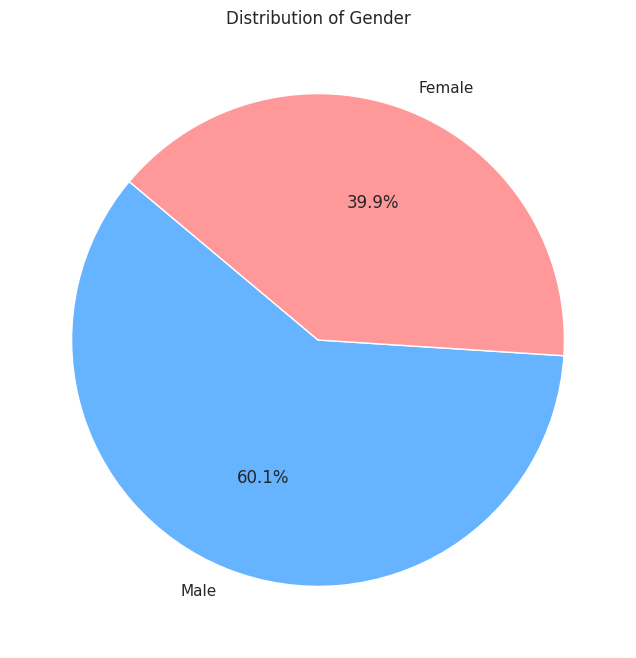

In [ ]:
# Map the gender values (1: Male, 0: Female) to their corresponding labels
data['Gender_Male'] = data['Gender_Male'].map({1: 'Male', 0: 'Female'})

# Get the distribution of gender
gender_distribution = data['Gender_Male'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Gender')
plt.show()

In [ ]:
data = data.drop(['Tenure', 'CityTier' , 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'], axis=1)

##Checking for Skewness##

In [ ]:
numerical_vars = data.select_dtypes(include=['float64', 'int64']).columns

skewness = data[numerical_vars].skew()

# Print skewness
print("Skewness of numeric columns:")
print(skewness)

Skewness of numeric columns:
Tenure_Capped                         0.696551
CityTier_Capped                       0.725830
WarehouseToHome_Capped                0.925649
HourSpendOnApp_Capped                -0.034695
NumberOfDeviceRegistered_Capped      -0.308289
SatisfactionScore_Capped             -0.094467
NumberOfAddress_Capped                0.970189
OrderAmountHikeFromlastYear_Capped    0.825351
CouponUsed_Capped                     0.497440
OrderCount_Capped                     1.082090
DaySinceLastOrder_Capped              0.813300
CashbackAmount_Capped                 0.909869
dtype: float64


The skewness chart shows that there are some columns which are skewed. Some are slightly skewed but others are highly skewed. I'll be focusing on removing the skews from the moderate to highly skewed variables.

Also, since most of the the variables are positively skewed, I'll be applying log transformation to address the right skewness. The variables with negative skewness have slight skewness which would not affect the analysis on a large scale.

The reason for including data transformation in the data cleaning process is to visualise the data in an almost perfect manner without the skewness.

##Log Transformation##

In [ ]:
# List of skewed variables
skewed_vars = ['Tenure_Capped', 'CityTier_Capped', 'WarehouseToHome_Capped', 'HourSpendOnApp_Capped', 'NumberOfAddress_Capped', 'OrderAmountHikeFromlastYear_Capped', 'CouponUsed_Capped', 'OrderCount_Capped', 'DaySinceLastOrder_Capped', 'CashbackAmount_Capped']

# Apply log transformation to the skewed variables
for var in skewed_vars:
    data[var + '_log'] = data[var].apply(lambda x: np.log(x + 1))

In [ ]:
skewness = data[skewed_vars].skew()

# Print skewness
print("Skewness of numeric columns:")
print(skewness)

Skewness of numeric columns:
Tenure_Capped                         0.696551
CityTier_Capped                       0.725830
WarehouseToHome_Capped                0.925649
HourSpendOnApp_Capped                -0.034695
NumberOfAddress_Capped                0.970189
OrderAmountHikeFromlastYear_Capped    0.825351
CouponUsed_Capped                     0.497440
OrderCount_Capped                     1.082090
DaySinceLastOrder_Capped              0.813300
CashbackAmount_Capped                 0.909869
dtype: float64


In [ ]:
skewness_capped = data[['Tenure_Capped', 'CityTier_Capped', 'WarehouseToHome_Capped', 'HourSpendOnApp_Capped', 'NumberOfAddress_Capped', 'OrderAmountHikeFromlastYear_Capped', 'CouponUsed_Capped', 'OrderCount_Capped', 'DaySinceLastOrder_Capped', 'CashbackAmount_Capped']].skew()  # Replace ... with other capped variables
print("Skewness of capped variables:")
print(skewness_capped)

# Skewness of log-transformed variables
skewness_log = data[['Tenure_Capped_log', 'CityTier_Capped_log', 'WarehouseToHome_Capped_log', 'HourSpendOnApp_Capped_log', 'NumberOfAddress_Capped_log', 'OrderAmountHikeFromlastYear_Capped_log', 'CouponUsed_Capped_log', 'OrderCount_Capped_log', 'DaySinceLastOrder_Capped_log', 'CashbackAmount_Capped_log' ]].skew()  # Replace ... with other log-transformed variables
print("\nSkewness of log-transformed variables:")
print(skewness_log)

Skewness of capped variables:
Tenure_Capped                         0.696551
CityTier_Capped                       0.725830
WarehouseToHome_Capped                0.925649
HourSpendOnApp_Capped                -0.034695
NumberOfAddress_Capped                0.970189
OrderAmountHikeFromlastYear_Capped    0.825351
CouponUsed_Capped                     0.497440
OrderCount_Capped                     1.082090
DaySinceLastOrder_Capped              0.813300
CashbackAmount_Capped                 0.909869
dtype: float64

Skewness of log-transformed variables:
Tenure_Capped_log                        -0.639876
CityTier_Capped_log                       0.702111
WarehouseToHome_Capped_log                0.267751
HourSpendOnApp_Capped_log                -0.475130
NumberOfAddress_Capped_log                0.222690
OrderAmountHikeFromlastYear_Capped_log    0.489142
CouponUsed_Capped_log                    -0.317715
OrderCount_Capped_log                     0.625066
DaySinceLastOrder_Capped_log         

##Root Transformation

In [ ]:
root_vars = data[['CityTier_Capped_log', 'OrderCount_Capped_log', 'CashbackAmount_Capped_log']]

for var in root_vars:
    data[var + '_sqrt'] = np.sqrt(data[var])

In [ ]:
skewness_log = data[['Tenure_Capped_log', 'CityTier_Capped_log', 'WarehouseToHome_Capped_log', 'HourSpendOnApp_Capped_log', 'NumberOfAddress_Capped_log', 'OrderAmountHikeFromlastYear_Capped_log', 'CouponUsed_Capped_log', 'OrderCount_Capped_log', 'DaySinceLastOrder_Capped_log', 'CashbackAmount_Capped_log' ]].skew()  # Replace ... with other log-transformed variables
print("\nSkewness of log-transformed variables:")
print(skewness_log)

skewness_root = data[['CityTier_Capped_log_sqrt', 'OrderCount_Capped_log_sqrt', 'CashbackAmount_Capped_log_sqrt']]
skewness_sqrt = skewness_root.skew()
print("\nSkewness of root-transformed variables:")
print(skewness_sqrt)


Skewness of log-transformed variables:
Tenure_Capped_log                        -0.639876
CityTier_Capped_log                       0.702111
WarehouseToHome_Capped_log                0.267751
HourSpendOnApp_Capped_log                -0.475130
NumberOfAddress_Capped_log                0.222690
OrderAmountHikeFromlastYear_Capped_log    0.489142
CouponUsed_Capped_log                    -0.317715
OrderCount_Capped_log                     0.625066
DaySinceLastOrder_Capped_log             -0.411585
CashbackAmount_Capped_log                 0.428188
dtype: float64

Skewness of root-transformed variables:
CityTier_Capped_log_sqrt          0.691429
OrderCount_Capped_log_sqrt        0.396131
CashbackAmount_Capped_log_sqrt    0.370173
dtype: float64


In [ ]:
data = data.drop(['Tenure_Capped', 'CityTier_Capped', 'CityTier_Capped_log' , 'WarehouseToHome_Capped', 'HourSpendOnApp_Capped', 'NumberOfAddress_Capped','OrderAmountHikeFromlastYear_Capped', 'CouponUsed_Capped', 'OrderCount_Capped', 'OrderCount_Capped_log' , 'DaySinceLastOrder_Capped', 'CashbackAmount_Capped', 'CashbackAmount_Capped_log'], axis=1)

In [ ]:
print(data.dtypes)

Churn                                     category
PreferredLoginDevice                      category
PreferredPaymentMode                      category
Gender                                    category
PreferedOrderCat                          category
MaritalStatus                             category
Complain                                  category
NumberOfDeviceRegistered_Capped            float64
SatisfactionScore_Capped                     int64
Tenure_Capped_log                          float64
WarehouseToHome_Capped_log                 float64
HourSpendOnApp_Capped_log                  float64
NumberOfAddress_Capped_log                 float64
OrderAmountHikeFromlastYear_Capped_log     float64
CouponUsed_Capped_log                      float64
DaySinceLastOrder_Capped_log               float64
CityTier_Capped_log_sqrt                   float64
OrderCount_Capped_log_sqrt                 float64
CashbackAmount_Capped_log_sqrt             float64
dtype: object


In [ ]:
# Select only numeric columns (float64 and int64)
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate skewness for numeric columns
overall_skewness = numeric_data.skew()

# Print the skewness values
print("Skewness of all numeric columns:")
print(overall_skewness)

Skewness of all numeric columns:
NumberOfDeviceRegistered_Capped          -0.308289
SatisfactionScore_Capped                 -0.094467
Tenure_Capped_log                        -0.639876
WarehouseToHome_Capped_log                0.267751
HourSpendOnApp_Capped_log                -0.475130
NumberOfAddress_Capped_log                0.222690
OrderAmountHikeFromlastYear_Capped_log    0.489142
CouponUsed_Capped_log                    -0.317715
DaySinceLastOrder_Capped_log             -0.411585
CityTier_Capped_log_sqrt                  0.691429
OrderCount_Capped_log_sqrt                0.396131
CashbackAmount_Capped_log_sqrt            0.370173
dtype: float64


Since the data is not severely skewed, I will be keeping these values as the final ones.

In [ ]:
# Rename the columns by removing everything after and including '_'
data.columns = data.columns.str.replace(r'(_.*)', '', regex=True)

# Display the updated column names
print(data.columns)

Index(['NumberOfDeviceRegistered', 'SatisfactionScore', 'Tenure',
       'WarehouseToHome', 'HourSpendOnApp', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'DaySinceLastOrder',
       'CityTier', 'OrderCount', 'CashbackAmount', 'Churn',
       'PreferredLoginDevice', 'PreferredLoginDevice', 'PreferredPaymentMode',
       'PreferredPaymentMode', 'PreferredPaymentMode', 'PreferredPaymentMode',
       'PreferredPaymentMode', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'PreferedOrderCat', 'PreferedOrderCat',
       'PreferedOrderCat', 'PreferedOrderCat', 'MaritalStatus',
       'MaritalStatus', 'Complain'],
      dtype='object')


In [ ]:
data

,Churn,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Complain,NumberOfDeviceRegistered,SatisfactionScore,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,DaySinceLastOrder,CityTier,OrderCount,CashbackAmount
0,1,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single,1,3.0,2,1.609438,1.945910,1.386294,2.302585,2.484907,0.693147,1.791759,1.177410,0.832555,2.254101
1,1,Phone,UPI,Male,Mobile,Single,1,4.0,3,2.302585,2.197225,1.386294,2.079442,2.772589,0.000000,0.000000,0.832555,0.832555,2.191621
2,1,Phone,Debit Card,Male,Mobile,Single,1,4.0,3,2.302585,3.433987,1.098612,1.945910,2.708050,0.000000,1.386294,0.832555,0.832555,2.190457
3,1,Phone,Debit Card,Male,Laptop & Accessory,Single,0,4.0,5,0.000000,2.772589,1.098612,2.197225,3.178054,0.000000,1.386294,1.177410,0.832555,2.214903
4,1,Phone,CC,Male,Mobile,Single,0,3.0,5,0.000000,2.564949,1.386294,1.386294,2.484907,0.693147,1.386294,0.832555,0.832555,2.207292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623,0,Computer,Credit Card,Male,Laptop & Accessory,Single,0,4.0,5,1.791759,2.564949,1.609438,1.098612,3.044522,1.098612,1.386294,0.832555,1.048147,2.327595
5624,0,Mobile Phone,UPI,Female,Mobile Phone,Single,0,5.0,3,0.693147,2.564949,1.098612,1.098612,2.995732,1.098612,0.693147,1.177410,1.048147,2.246703
5626,0,Mobile Phone,Credit Card,Male,Fashion,Married,0,5.0,5,2.639057,2.639057,1.386294,1.945910,2.833213,0.693147,1.386294,0.832555,1.048147,2.328119
5627,0,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married,1,2.0,4,0.693147,2.484907,1.386294,1.386294,3.091042,0.693147,1.609438,0.832555,1.048147,2.287652


Explanation for removing uncapped columns and skewed columns- I removed the initial columns which were raw as a part of the data cleaning process. I did this because if I were to keep the unclean variables, I was getting a worse accuracy score for my best model. I was getting an F1-Score of 97% for my Random Forest when keeping the unclean variables whereas, if I removed them, it improved my score to 99%.

For visualisations, I used the clean data as well as it was free of errors and anomalies and gave me a better analysis of the data.

# 4. Churn Bar Chart

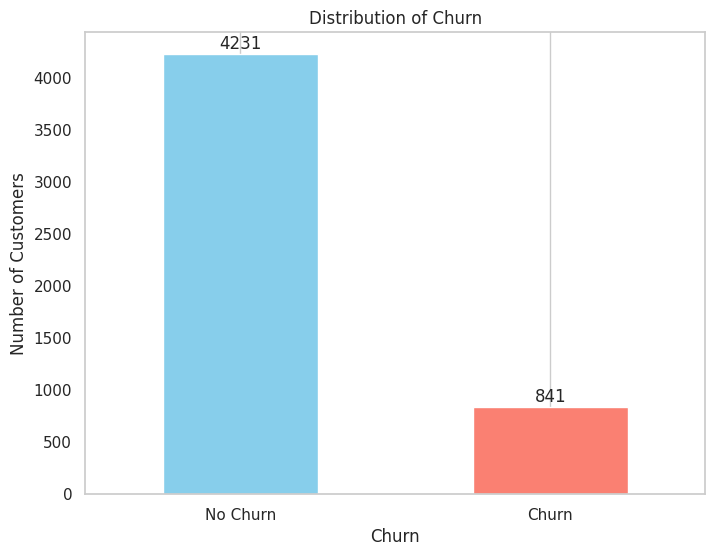

In [ ]:
churn_counts = data['Churn'].value_counts()

plt.figure(figsize=(8, 6))
bars = churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])

for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10,
             int(height), ha='center', va='bottom')

plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'], rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
print(data.dtypes)

Churn                          category
PreferredLoginDevice           category
PreferredPaymentMode           category
Gender                         category
PreferedOrderCat               category
MaritalStatus                  category
Complain                       category
NumberOfDeviceRegistered        float64
SatisfactionScore                 int64
Tenure                          float64
WarehouseToHome                 float64
HourSpendOnApp                  float64
NumberOfAddress                 float64
OrderAmountHikeFromlastYear     float64
CouponUsed                      float64
DaySinceLastOrder               float64
CityTier                        float64
OrderCount                      float64
CashbackAmount                  float64
dtype: object


In [ ]:
#Encoding Churn into Numerical for Correlation matrix

data['Churn'] = pd.Categorical(data['Churn']).codes

##Correlation Matrix for numerical variables##

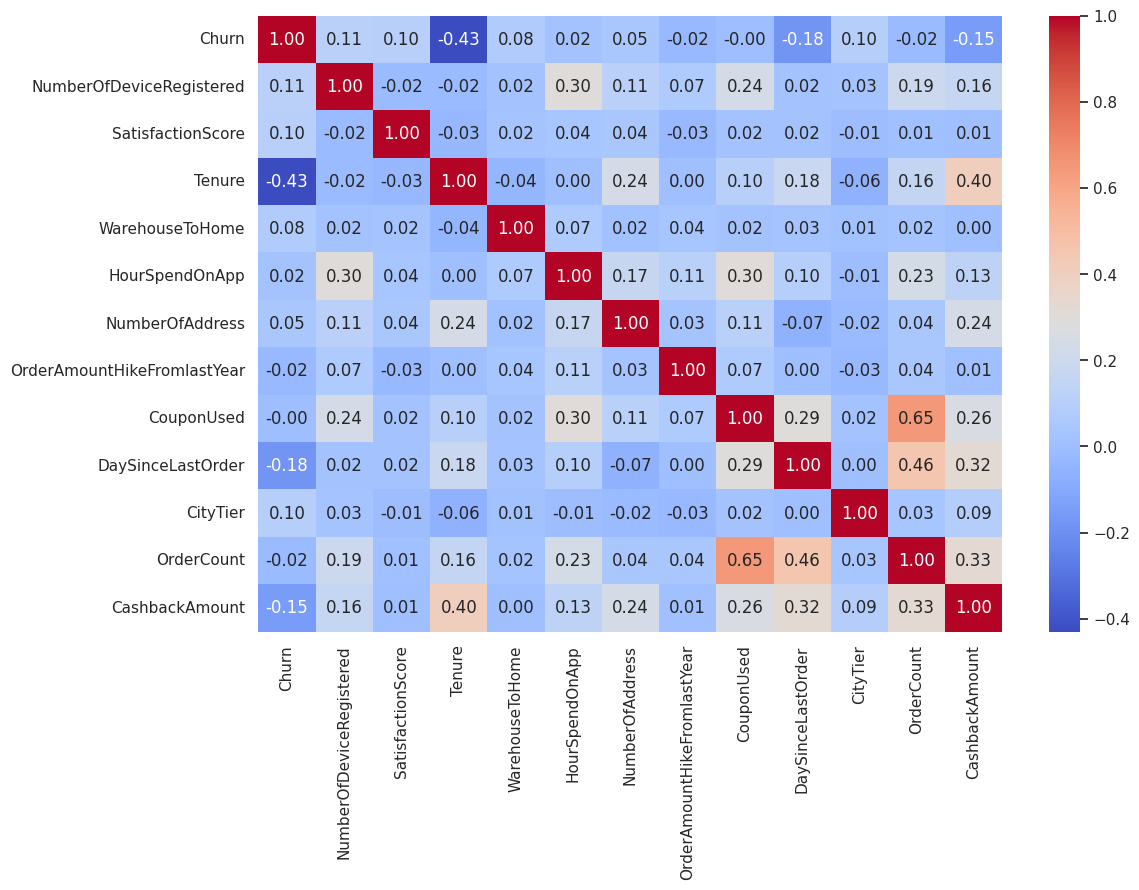

Churn                          1.000000
NumberOfDeviceRegistered       0.114647
SatisfactionScore              0.101005
CityTier                       0.097775
WarehouseToHome                0.076758
NumberOfAddress                0.047268
HourSpendOnApp                 0.017488
CouponUsed                    -0.004649
OrderCount                    -0.021518
OrderAmountHikeFromlastYear   -0.024744
CashbackAmount                -0.151662
DaySinceLastOrder             -0.180179
Tenure                        -0.429588
Name: Churn, dtype: float64


In [ ]:
# Calculate correlation matrix, only including numeric columns
corr_matrix = data.corr(numeric_only=True)

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

if 'Churn' in corr_matrix.columns:
    # Correlation with churn
    churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
    print(churn_corr)
else:
    print("Column 'Churn' not found in correlation matrix. Check for typos or if it was dropped earlier.")

Interpretations:

1. Tenure and Churn:
 I've identified a moderate negative correlation (-0.43) between Tenure and Churn. This is our most significant lever for reducing churn. Customers who stay with us longer are less likely to leave, so I recommend we prioritize strategies to increase customer tenure.

2. Cashback's Impact:
CashbackAmount_log_sqrt has a slight negative correlation with Churn (-0.15) and a moderate positive correlation with Tenure (0.40). This suggests our cashback program could be an effective tool in reducing churn by encouraging longer tenure.

3. Order Frequency:
OrderCount shows a very weak negative correlation with Churn (-0.02). While small, this indicates that customers who order more frequently are somewhat less likely to churn. Encouraging repeat purchases could help reduce churn.

4. Coupon Usage:
Interestingly, CouponUsed shows almost no correlation with Churn (0.00), but it has a moderate correlation with OrderCount (0.30). This suggests that while coupons don't directly impact churn, they could indirectly help by increasing order frequency.

5. Satisfaction and Churn:
I've observed a very weak positive correlation (0.01) between SatisfactionScore_Capped and Churn. This counterintuitive result suggests we may need to reassess how we measure customer satisfaction to ensure it aligns with reducing churn.

6. Complaints and Churn:
There's a weak positive correlation (0.27) between Complain_Capped and Churn. This indicates that addressing customer complaints promptly and effectively could be crucial in our churn reduction efforts.

7. App Engagement:
HourSpendOnApp shows a weak positive correlation (0.07) with Churn. This suggests that while app engagement isn't strongly linked to churn, there might be an opportunity to use the app more effectively for retention.

In [ ]:
# Group by 'Tenure' and calculate the churn rate for each tenure year
churn_by_tenure = data.groupby('Tenure')['Churn'].mean() * 100

# Display the churn rate as a percentage
print(churn_by_tenure)

Tenure
0.000000    53.172867
0.693147    49.919225
1.098612     7.894737
1.386294     8.522727
1.609438     8.648649
1.791759     7.936508
1.945910     3.614458
2.079442     6.666667
2.197225     5.579399
2.302585    17.429194
2.397895     7.142857
2.484907     5.172414
2.564949     3.797468
2.639057     7.975460
2.708050     8.860759
2.772589     7.042254
2.833213     7.299270
2.890372     4.123711
2.944439     5.454545
2.995732     7.200000
3.044522    14.141414
3.091042    13.513514
3.135494     0.000000
3.178054     0.000000
3.218876     0.000000
3.258097     0.000000
3.295837     0.000000
3.332205     0.000000
3.367296     0.000000
3.401197     0.000000
3.433987     0.000000
3.465736     0.000000
3.526361     0.000000
Name: Churn, dtype: float64


#Bar Charts for Categorical variables#

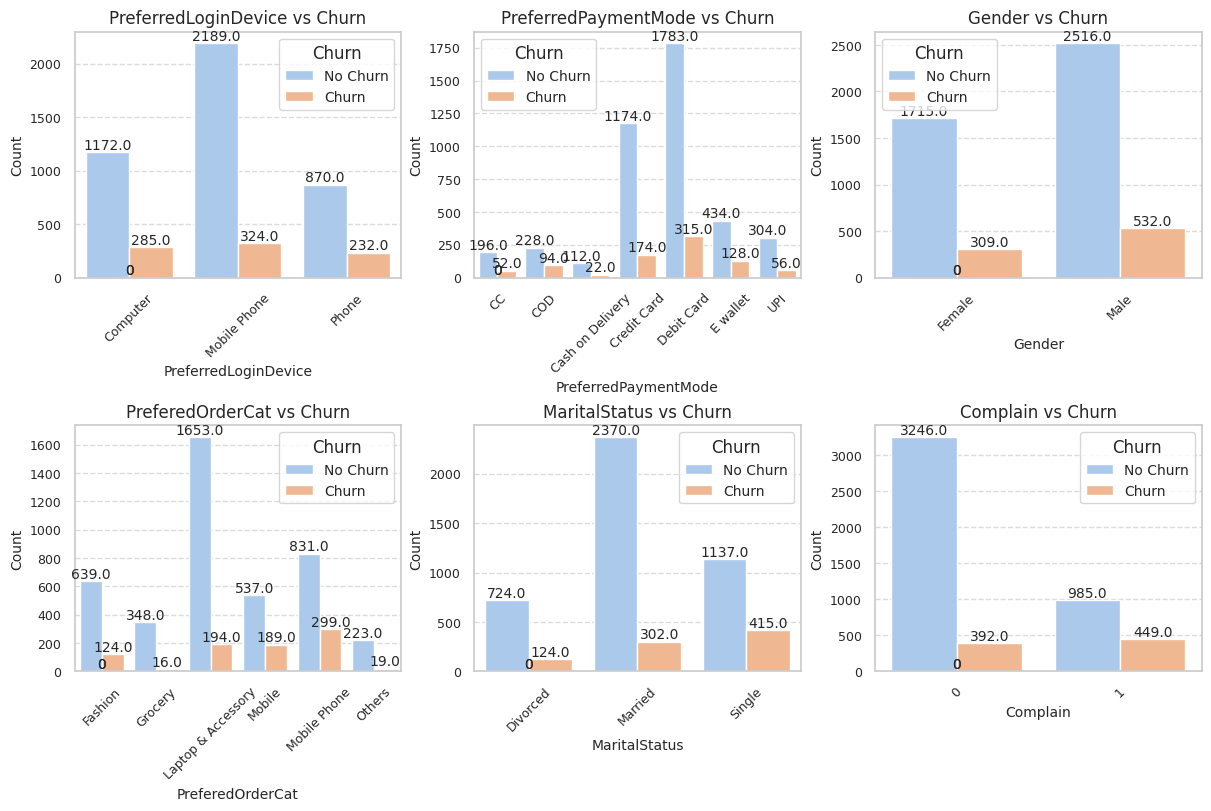

In [ ]:
categorical_vars = data.select_dtypes(include=['category', 'object']).columns

num_features = len(categorical_vars)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows), constrained_layout=True)
axes = axes.flatten()

for i, feature in enumerate(categorical_vars):
    ax = axes[i]


    sns.countplot(x=feature, hue='Churn', data=data, palette='pastel', ax=ax)


    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height
        ax.text(x, y, f'{height}', ha='center', va='bottom', fontsize=10)


    ax.set_title(f'{feature} vs Churn', fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.legend(title='Churn', labels=['No Churn', 'Churn'], fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hide any remaining empty subplots
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.show()

Interpretations:

1. When analyzing the Preferred Login Device vs. Churn graph, I notice that a significant number of users who prefer to log in using a mobile phone tend not to churn. Specifically, there are 2,190 users who continue to use the service without churning, compared to 324 who churn. In contrast, for users who prefer logging in via computer, 1,172 do not churn, while 285 do. This indicates a higher retention rate among mobile phone users. Interestingly, no users who prefer logging in via a computer churn, which could suggest high satisfaction within this group.

2. Looking at the Preferred Payment Mode vs. Churn graph, I observe that users preferring to pay with a debit card show the highest number of non-churners, with 1,783 not churning and 315 churning. Credit card users follow, with 1,174 non-churners and 174 churners. On the other hand, users who prefer cash on delivery exhibit the lowest retention rate, with only 113 not churning and 22 churning. This suggests that electronic payment methods, particularly debit cards, are associated with higher retention rates among users.

3. From the Gender vs. Churn graph, it is evident that male users are more likely to churn compared to female users. Specifically, 2,515 males do not churn, whereas 532 males churn. In comparison, 1,717 females do not churn, and only 309 females churn. This indicates a higher churn rate among male users, suggesting that females are generally more satisfied or engaged with the service.

4. I notice that the "Laptop & Accessory" category has the highest number of customers, with 1653 non-churned and 194 churned users. The "Mobile phone" category follows as the second most popular, showing 831 non-churned and 299 churned customers. Interestingly, the "Fashion" category has a notable difference between non-churned 639 and churned 124 customers, suggesting it might be an area where customer retention is relatively strong.

5. Looking at the "MaritalStatus vs Churn" graph, I observe that married customers form the largest group, with 2370 non-churned and 302 churned individuals. Single customers come next, showing 1138 non-churned and 415 churned customers. The divorced category is the smallest, with 724 non-churned customers and 124 churned ones. It's worth noting that the churn rate appears to be proportionally higher among single customers compared to married ones, which could be an interesting point for further analysis.

Therefore, customers who prefer logging in via mobile phones and those using debit cards for payments show higher retention rates, indicating their satisfaction with the service. Gender-wise, female users tend to stay with the service longer than male users. When looking at preferred order categories, "Laptop & Accessory" and "Mobile phone" have the highest customer base, with the "Fashion" category showing strong retention. Marital status also plays a role in churn, with married customers having a lower churn rate compared to single ones. These patterns suggest that targeted strategies to enhance user experience for mobile login users, electronic payment users, and single customers could effectively reduce churn rates.

#Bar charts for Numerical variables

In [ ]:
data['Churn'] = data['Churn'].astype('category')
print(data.dtypes)

Churn                          category
PreferredLoginDevice           category
PreferredPaymentMode           category
Gender                         category
PreferedOrderCat               category
MaritalStatus                  category
Complain                       category
NumberOfDeviceRegistered        float64
SatisfactionScore                 int64
Tenure                          float64
WarehouseToHome                 float64
HourSpendOnApp                  float64
NumberOfAddress                 float64
OrderAmountHikeFromlastYear     float64
CouponUsed                      float64
DaySinceLastOrder               float64
CityTier                        float64
OrderCount                      float64
CashbackAmount                  float64
dtype: object


<ipython-input-77-f20b95a20d18>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(x='Churn', y=var, data=data.groupby('Churn')[var].mean().reset_index(), hue='Churn', palette='viridis', ax=axes[idx], legend=False)
<ipython-input-77-f20b95a20d18>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(x='Churn', y=var, data=data.groupby('Churn')[var].mean().reset_index(), hue='Churn', palette='viridis', ax=axes[idx], legend=False)
<ipython-input-77-f20b95a20d18>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obser

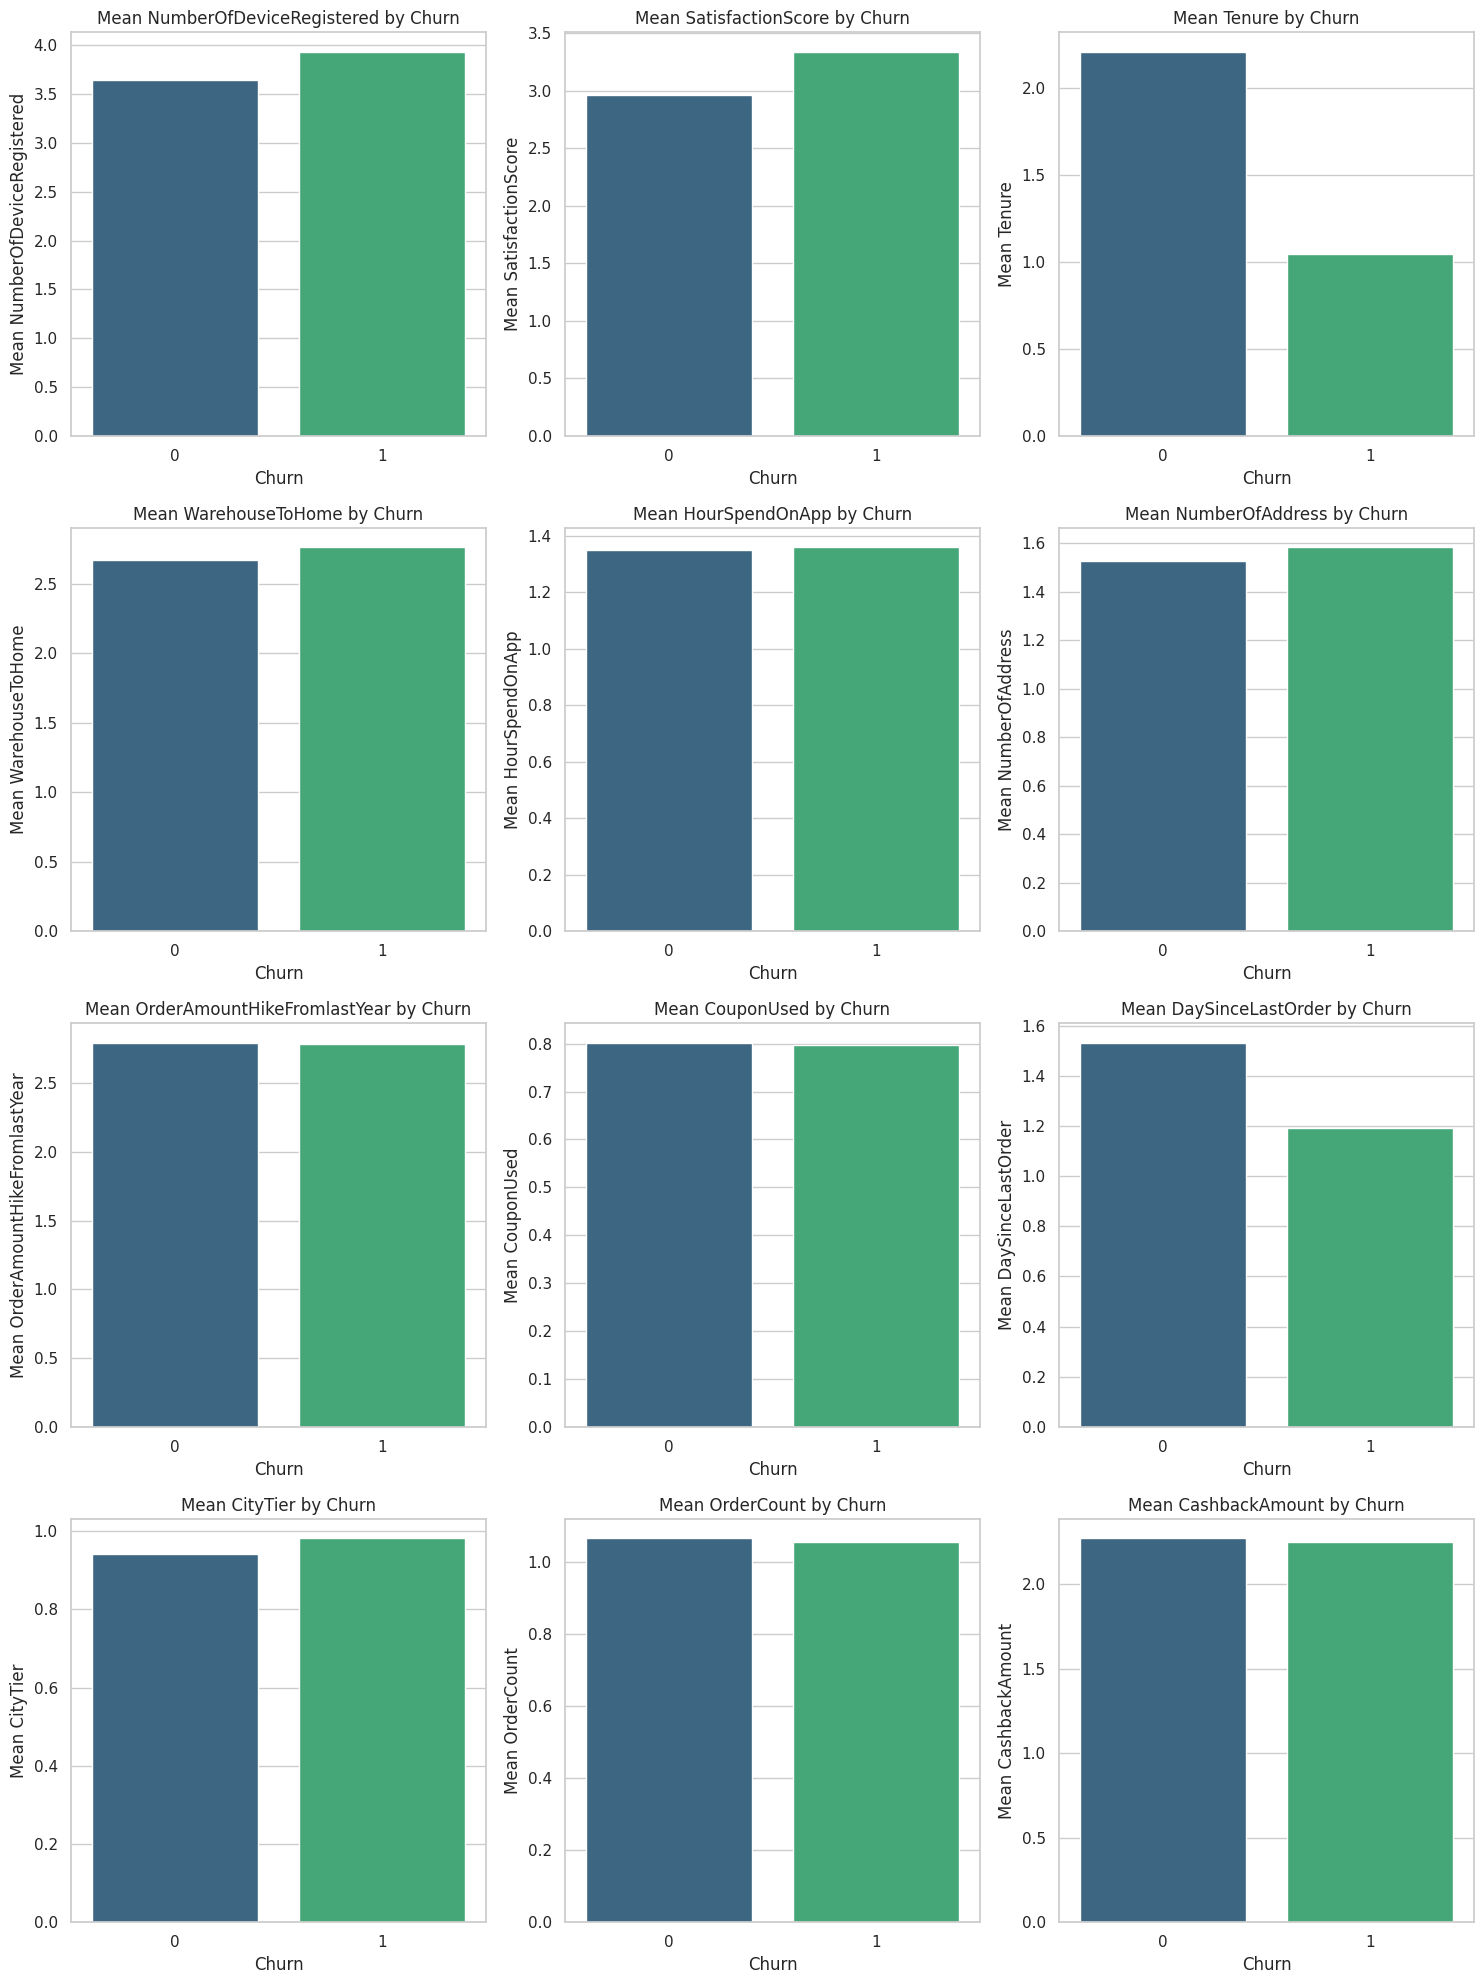

In [ ]:
numerical_vars = data.select_dtypes(include='number').columns

n = len(numerical_vars)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols


fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), squeeze=False)


axes = axes.flatten()


for idx, var in enumerate(numerical_vars):
    if var == 'Churn':
        continue

    sns.barplot(x='Churn', y=var, data=data.groupby('Churn')[var].mean().reset_index(), hue='Churn', palette='viridis', ax=axes[idx], legend=False)
    axes[idx].set_title(f'Mean {var} by Churn')
    axes[idx].set_xlabel('Churn')
    axes[idx].set_ylabel(f'Mean {var}')


for ax in axes[n:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

Interpretations:

1. Mean Tenure by Churn: The graph indicates that customers who have not churned exhibit a substantially higher mean tenure compared to those who have churned. This suggests that customers with longer tenures are more likely to remain with the service, highlighting the importance of customer retention efforts over time.

2. Mean CityTier by Churn: The mean CityTier for both churned and non-churned customers is nearly identical, indicating that the geographical tier of a city does not significantly influence customer churn. This suggests that other factors beyond geographic segmentation might be more critical in understanding customer retention.

3. Mean WarehouseToHome by Churn: The average distance from the warehouse to the customer's home is very similar for both churned and non-churned customers. This indicates that logistical factors, such as the proximity of the warehouse to the customer's residence, do not play a significant role in customer churn.

4. Mean HourSpendOnApp by Churn: The mean number of hours spent on the app is almost the same for both churned and non-churned customers, suggesting that the duration of app usage does not have a strong correlation with customer churn. This implies that app engagement metrics may need to be examined in conjunction with other variables to understand churn better.

5. Mean NumberOfDeviceRegistered by Churn: There is no substantial difference in the mean number of devices registered between churned and non-churned customers, indicating that the number of devices a customer registers does not significantly impact their likelihood of churning.

6. Mean SatisfactionScore by Churn: The satisfaction score is fairly consistent between both groups, implying that overall satisfaction levels, as measured, do not significantly differentiate between customers who churn and those who remain. This suggests that other aspects of customer experience might be influencing churn more strongly.

7. Mean NumberOfAddress by Churn: The mean number of addresses maintained by customers is similar regardless of their churn status, indicating that the number of addresses associated with a customer's account is not a significant factor in predicting churn.

8. Mean Complain by Churn: The data reveals that churned customers have a higher mean number of complaints compared to non-churned customers. This suggests a strong correlation between customer complaints and churn, indicating that addressing customer grievances promptly and effectively could be critical in reducing churn rates.

9. Mean OrderAmountHikeFromlastYear by Churn: The average increase in order amount from the previous year is similar for both groups. This indicates that changes in order value over time do not significantly influence whether customers decide to churn.

10. Mean CouponUsed by Churn: The mean number of coupons used is nearly the same for both churned and non-churned customers. This suggests that the usage of promotional coupons does not have a strong impact on customer retention or churn.

11. Mean OrderCount by Churn: The mean order count is comparable between both groups, indicating that the total number of orders placed does not significantly influence customer churn. This implies that frequency of orders alone may not be sufficient to predict churn behavior.

12. Mean DaySinceLastOrder by Churn: Customers who have churned have a lower mean number of days since their last order compared to those who have not churned. This might indicate that recent purchasing activity is not necessarily a deterrent to churn, and other factors such as customer satisfaction or competitive offerings might be at play.

13. Mean CashbackAmount by Churn: The mean cashback amount received by churned customers is slightly lower than that of non-churned customers, suggesting that cashback incentives may have a minor but notable impact on customer retention. This indicates that financial incentives could play a role in customer loyalty strategies.

In [ ]:
print(data.dtypes)

Churn                          category
PreferredLoginDevice           category
PreferredPaymentMode           category
Gender                         category
PreferedOrderCat               category
MaritalStatus                  category
Complain                       category
NumberOfDeviceRegistered        float64
SatisfactionScore                 int64
Tenure                          float64
WarehouseToHome                 float64
HourSpendOnApp                  float64
NumberOfAddress                 float64
OrderAmountHikeFromlastYear     float64
CouponUsed                      float64
DaySinceLastOrder               float64
CityTier                        float64
OrderCount                      float64
CashbackAmount                  float64
dtype: object


#Histogram for Continuous Variables

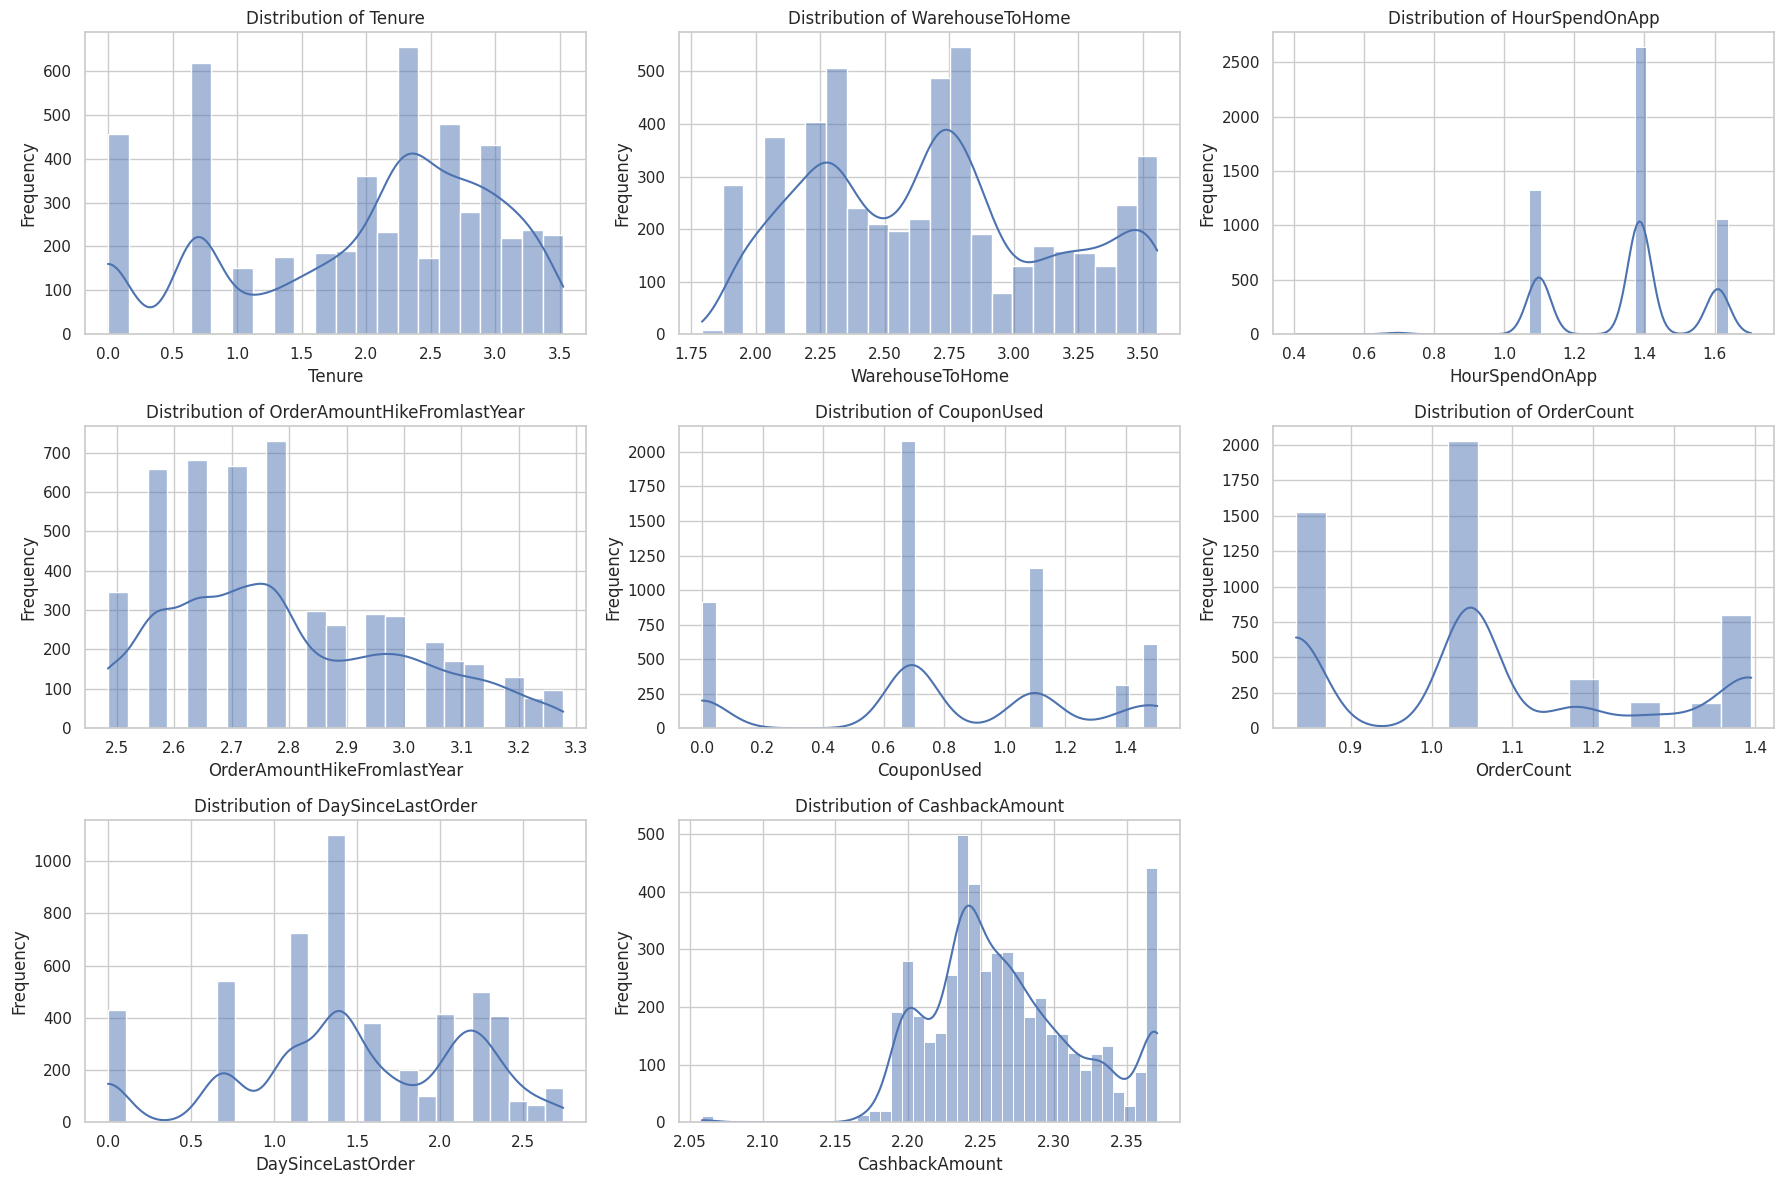

In [ ]:
continuous_vars = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear',
    'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

plt.figure(figsize=(18, 12))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Interpretations:

1. The distribution of Tenureindicates that most customers have a tenure of fewer than 1.5 log units, with noticeable peaks around 0.5 and 2.5 log units. This suggests the company has a relatively young customer base with high initial turnover, but a smaller segment of loyal customers stays longer.

2. The distribution of WarehouseToHome shows a concentration of customers within 2 to 3 log units of distance from the warehouse, with some outliers beyond 3.5 log units. Most customers reside relatively close to the warehouse, implying a regional business focus or efficient local delivery, with a few remote customers.

3. The distribution of HourSpendOnApp features distinct peaks around 0.9, 1.2, and 1.6 log units, indicating specific durations of customer engagement. These peaks suggest common usage patterns likely tied to certain app features or services that engage users for set periods.

4. The distribution of OrderAmountHikeFromlastYear shows most customers experience a moderate increase in order amounts, primarily between 2.7 and 3 log units. Significant hikes are less common, indicating that the majority of customers see incremental increases in their order amounts year over year.

5. The distribution of CouponUsed shows most customers use between 0.5 to 1.2 log units of coupons, with noticeable peaks. This suggests that while coupon usage is common, extensive use is rare, possibly due to limited availability or lower perceived value of additional coupons.

6. The distribution of OrderCount is skewed towards lower counts, with peaks around 0.9 and 1.3 log units. This indicates that most customers place a few orders, and frequent ordering is less typical, but certain order frequencies are common among customers.

7. The distribution of DaySinceLastOrder shows most customers placed an order within the last 1.5 log units of days, with decreasing frequency as days since the last order increase. This pattern reflects high recent engagement, with a long tail of customers who have not ordered recently.

8. The distribution of CashbackAmount shows a concentration around 2.2 to 2.3 log units, tapering off as the cashback amount increases. This indicates that while moderate cashback amounts are common, higher amounts are less frequent, reflecting company policy or customer spending patterns.

In [ ]:
data.dtypes

,0
Churn,category
PreferredLoginDevice,category
PreferredPaymentMode,category
Gender,category
PreferedOrderCat,category
MaritalStatus,category
Complain,category
NumberOfDeviceRegistered,float64
SatisfactionScore,int64
Tenure,float64


#Distribution Bar Chart

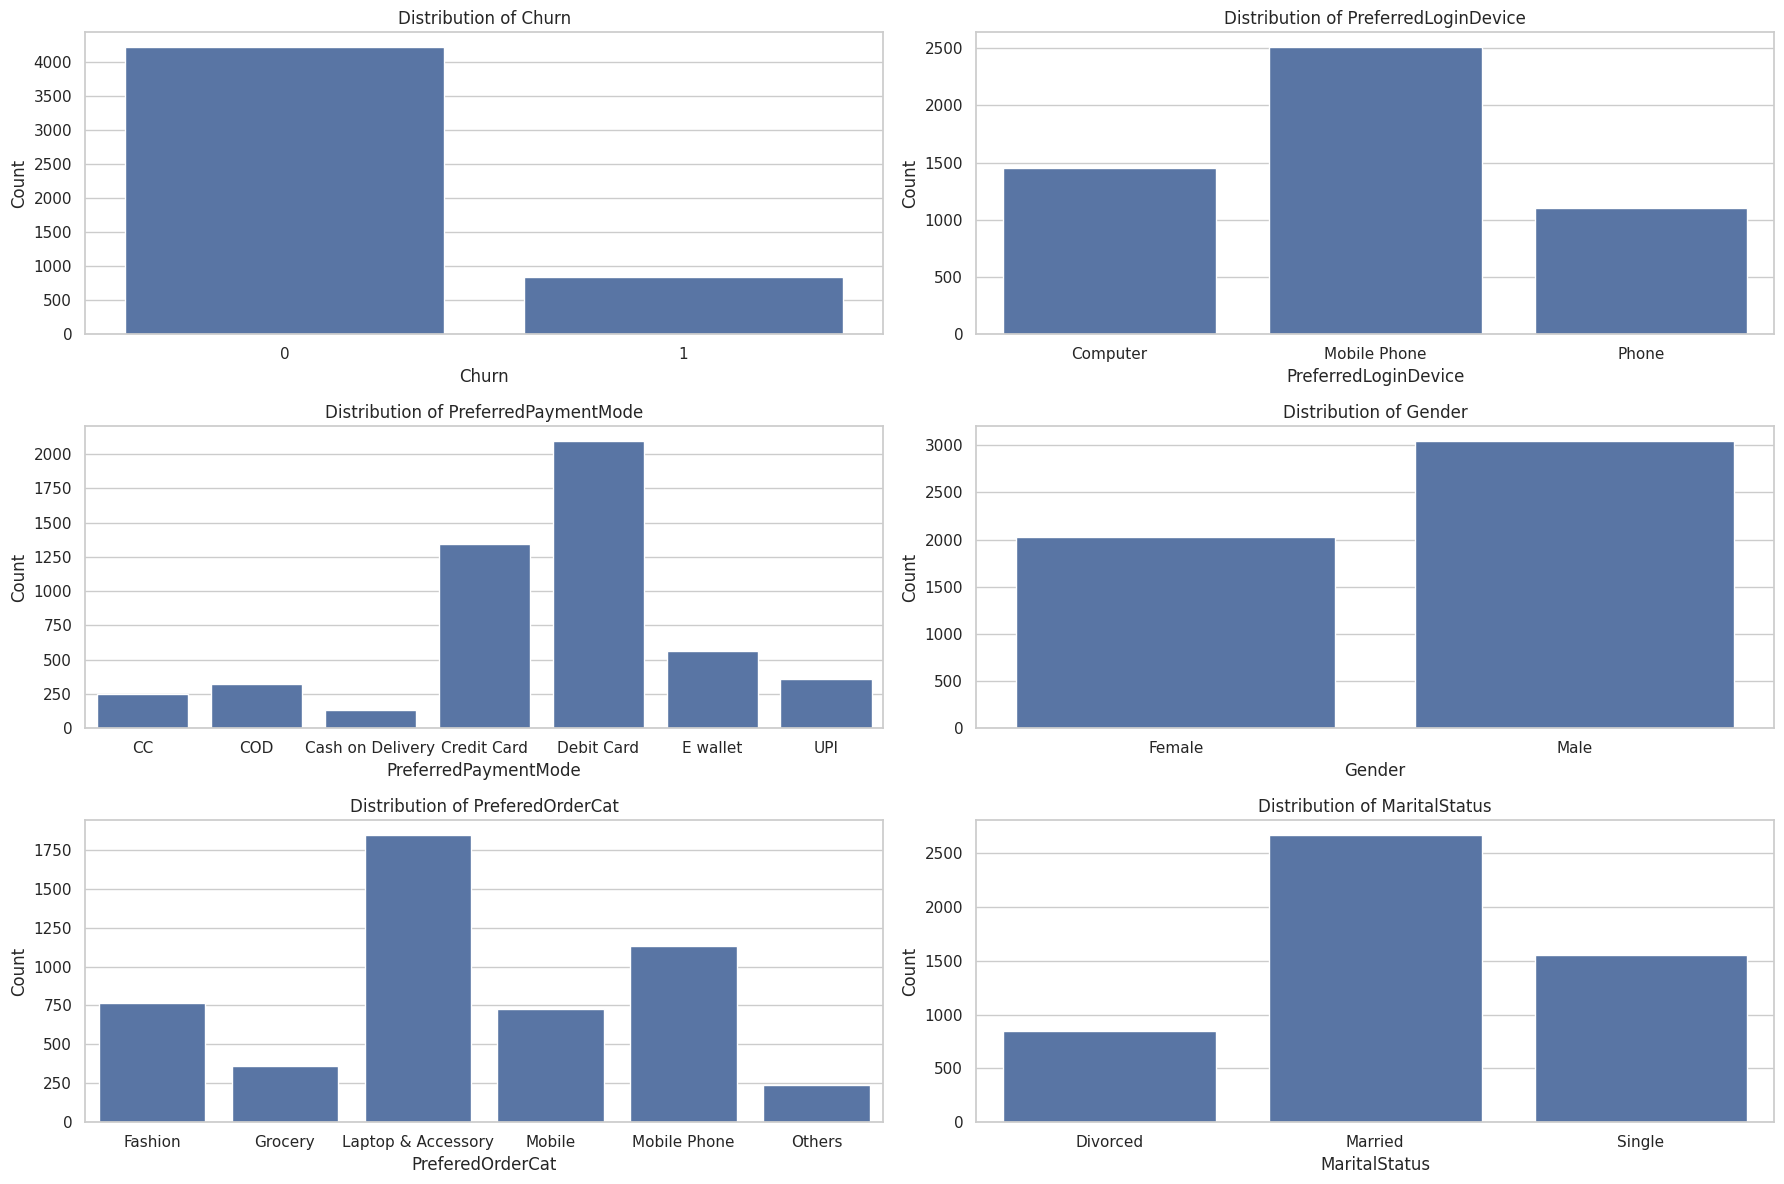

In [ ]:
categorical_vars = [
    'Churn', 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
    'PreferedOrderCat', 'MaritalStatus'
]

plt.figure(figsize=(18, 12))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=data, x=var)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Interpretations:

1. In analyzing the distribution of churn, I observe that the majority of customers have not churned, indicating a relatively stable customer base. However, a significant minority has churned, which suggests there are areas for improvement in customer retention strategies.

2. The distribution of internet service types reveals that the majority of customers use fiber optic services, followed by DSL, with a smaller portion using no internet service. This highlights the preference for high-speed internet among customers.

3. Examining the payment methods, I see that electronic check is the most common, followed by mailed check, bank transfer, and credit card. This suggests a diverse range of payment preferences among customers, with a notable inclination towards electronic transactions.

4. The contract distribution shows that month-to-month contracts are the most prevalent, followed by one-year and two-year contracts. This indicates a preference for flexibility among customers, with fewer committing to long-term contracts.

5. The gender distribution is fairly balanced, with a slight majority of male customers. This balance suggests that the services offered appeal equally to both genders, without significant bias.

6. In the partner distribution, a larger portion of customers do not have partners compared to those who do. This could imply that the services are particularly appealing to single individuals or those without partners.

7. The distribution of dependents shows that the majority of customers do not have dependents. This might indicate that the services are more attractive to individuals or couples without children.

8. The marital status distribution reveals that a significant portion of customers are married, followed by those who are single, divorced, or widowed. This suggests that the services cater well to a diverse range of marital statuses, with a strong appeal to married individuals.

#Correlation between Numeric and Categorical variables (ANOVA)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_summary = {}

for var in numerical_vars:
    if 'Churn' in data.columns:
        model = ols(f'{var} ~ C(Churn)', data=data).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)

        f_stat = anova_table['F'][0]
        p_value = anova_table['PR(>F)'][0]

        anova_summary[var] = {
            'F-Statistic': f_stat,
            'P-Value': p_value
        }

anova_summary_df = pd.DataFrame(anova_summary).T
anova_summary_df.columns = ['F-Statistic', 'P-Value']

print("ANOVA Summary:")
print(anova_summary_df)

ANOVA Summary:
                             F-Statistic        P-Value
NumberOfDeviceRegistered       67.527174   2.613954e-16
SatisfactionScore              52.256980   5.594375e-13
Tenure                       1147.394626  6.513029e-227
WarehouseToHome                30.048312   4.418105e-08
HourSpendOnApp                  1.551101   2.130305e-01
NumberOfAddress                11.353046   7.588654e-04
OrderAmountHikeFromlastYear     3.105993   7.806490e-02
CouponUsed                      0.109570   7.406476e-01
DaySinceLastOrder             170.116715   2.864433e-38
CityTier                       48.936806   2.986710e-12
OrderCount                      2.348716   1.254487e-01
CashbackAmount                119.362349   1.762665e-27


<ipython-input-82-93dd2a5aa9bb>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_stat = anova_table['F'][0]
<ipython-input-82-93dd2a5aa9bb>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
<ipython-input-82-93dd2a5aa9bb>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_stat = anova_table['F'][0]
<ipython-input-82-93dd2a5aa9bb>:12: FutureWarning: Series.__getitem__ treating keys as positions 

1. NumberOfDeviceRegistered: The ANOVA results indicate a highly significant effect of NumberOfDeviceRegistered on Churn, with an F-Statistic of 67.53 and an extremely low P-Value (2.61e-16). This suggests that the number of devices registered by a customer is a significant predictor of churn.

2. SatisfactionScore: The analysis reveals a significant relationship between SatisfactionScore and Churn, with an F-Statistic of 52.26 and a P-Value of (5.59e-13). This highlights that customer satisfaction scores are a strong determinant of churn likelihood.

3. Tenure: The ANOVA results indicate a highly significant effect of Tenure on Churn, with an F-Statistic of 1147.39 and an extremely low P-Value (6.51e-227). This suggests that the duration of a customer's engagement with the service strongly influences their likelihood to churn.

4. WarehouseToHome: The significant F-Statistic of 30.05 and a low P-Value (4.42e-08) for WarehouseToHome indicate that the distance between the warehouse and the customer's home significantly affects their likelihood of churning.

5. HourSpendOnApp: The results for HourSpendOnApp show an F-Statistic of 1.55 and a P-Value of 0.21, suggesting that the amount of time a customer spends on the app does not have a significant impact on their likelihood to churn.

6. NumberOfAddress: The F-Statistic of 11.35 and a P-Value of (7.59e-04) indicate a significant effect of NumberOfAddress on Churn, suggesting that the number of addresses associated with a customer influences their propensity to churn.

7. OrderAmountHikeFromlastYear: The F-Statistic of 3.11 and a P-Value of 0.08 suggest that OrderAmountHikeFromlastYear does not have a significant effect on Churn, indicating that changes in order amounts over the past year are not a strong predictor of churn.

8. CouponUsed: The analysis shows an F-Statistic of 0.11 and a P-Value of 0.74, indicating that the use of coupons does not significantly affect Churn. This suggests that coupon usage is not a major factor influencing customer churn.

9. DaySinceLastOrder: The high F-Statistic of 170.12 and a very low P-Value (2.86e-38) indicate a significant effect of DaySinceLastOrder on Churn, showing that the time elapsed since a customer's last order is a strong predictor of their likelihood to churn.

10. CityTier: The analysis shows that CityTier has a significant impact on Churn, evidenced by an F-Statistic of 48.94 and a P-Value of (2.99e-12). This suggests that customers from different city tiers exhibit varying propensities to churn.

11. OrderCount: With an F-Statistic of 2.35 and a P-Value of 0.13, OrderCount does not have a significant effect on Churn, suggesting that the number of orders placed by a customer is not a strong predictor of their likelihood to churn.

12. CashbackAmount: The significant F-Statistic of 119.36 and a low P-Value (1.76e-27) reveal that CashbackAmount has a strong impact on Churn, indicating that the amount of cashback received by customers is a significant factor in predicting churn.

#PCA Analysis

PCA Summary:
   Principal Component  Explained Variance Ratio  \
0                  PC1                  0.213310   
1                  PC2                  0.112516   
2                  PC3                  0.104923   
3                  PC4                  0.086584   
4                  PC5                  0.086265   
5                  PC6                  0.082878   
6                  PC7                  0.076522   
7                  PC8                  0.062604   
8                  PC9                  0.056800   
9                 PC10                  0.049091   
10                PC11                  0.041849   
11                PC12                  0.026658   

    Cumulative Explained Variance Ratio  
0                              0.213310  
1                              0.325826  
2                              0.430749  
3                              0.517333  
4                              0.603598  
5                              0.686475  
6               

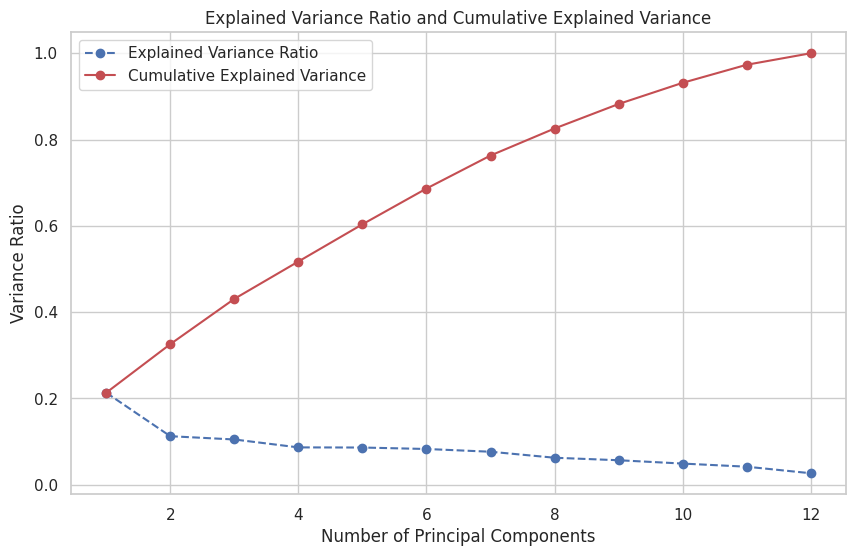


PCA-transformed Data (first 5 rows):
        PC1       PC2
0  0.700720 -1.045515
1  2.368848  0.014665
2  2.105233 -0.459192
3  2.176693  1.018881
4  1.998219  0.917083


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data[numerical_vars]
X_standardized = StandardScaler().fit_transform(X)

pca = PCA()
principal_components = pca.fit_transform(X_standardized)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

pca_summary = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance Ratio': cumulative_explained_variance
})

print("PCA Summary:")
print(pca_summary)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b', label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='r', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance Ratio and Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

data_pca = pd.DataFrame(data=principal_components[:, :2], columns=['PC1', 'PC2'])
print("\nPCA-transformed Data (first 5 rows):")
print(data_pca.head())

The first principal component (PC1) values range from 0.70 to 2.37, while the second principal component (PC2) values vary between -1.05 and 1.02. This transformation indicates that the original features have been reduced to two key components that capture the most variance in the data. For instance, the first row has a relatively moderate value on PC1 (0.70) but a negative value on PC2 (-1.05), suggesting it contributes differently to the variance captured by these components. In contrast, the second row shows a high positive value on PC1 (2.37) and is almost neutral on PC2 (0.01), indicating a strong influence on the first principal component.

In [ ]:
data = pd.get_dummies(data, drop_first=True)
data = data.applymap(lambda x: 1 if x is True else (0 if x is False else x))

<ipython-input-84-6c45958323cf>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [ ]:
data.dtypes

,0
NumberOfDeviceRegistered,float64
SatisfactionScore,int64
Tenure,float64
WarehouseToHome,float64
HourSpendOnApp,float64
NumberOfAddress,float64
OrderAmountHikeFromlastYear,float64
CouponUsed,float64
DaySinceLastOrder,float64
CityTier,float64


#Modeling

In [ ]:
X = data.drop(columns=['Churn_1'])
y = data['Churn_1']

In [ ]:
print(pd.DataFrame(X_standardized, columns=[f"feature_{i}" for i in range(X_standardized.shape[1])]).head())

print(X_standardized.shape)
print(len(X.columns))

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


print(pd.DataFrame(X_standardized, columns=[f"feature_{i}" for i in range(X_standardized.shape[1])]).head())

   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.731874  -0.742222  -0.406068  -1.585162   0.181672   1.639847   
1   0.324340  -0.019937   0.282528  -1.046869   0.181672   1.163281   
2   0.324340  -0.019937   0.282528   1.602170  -1.362372   0.878099   
3   0.324340   1.424634  -2.004937   0.185511  -1.362372   1.414829   
4  -0.731874   1.424634  -2.004937  -0.259234   0.181672  -0.317068   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  
0  -1.502565  -0.230186   0.447929   1.441033    -1.18387   -0.264061  
1  -0.096282  -1.705774  -2.106852  -0.723231    -1.18387   -1.457963  
2  -0.411767  -1.705774  -0.130204  -0.723231    -1.18387   -1.480198  
3   1.885763  -1.705774  -0.130204   1.441033    -1.18387   -1.013080  
4  -1.502565  -0.230186  -0.130204  -0.723231    -1.18387   -1.158501  
(5072, 12)
29
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.731874  -0.742222  -0.406068  -1.585162   0.181672

##Decision Trees##

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=1)

In [ ]:
print(f"Number of samples in the training set (X_train): {X_train.shape[0]}")
print(f"Number of samples in the training set (y_train): {y_train.shape[0]}")

# Print the number of rows in X_test and y_test
print(f"Number of samples in the test set (X_test): {X_test.shape[0]}")
print(f"Number of samples in the test set (y_test): {y_test.shape[0]}")

total_samples = X_train.shape[0] + X_test.shape[0]
print(f"Total number of samples: {total_samples}")

Number of samples in the training set (X_train): 4057
Number of samples in the training set (y_train): 4057
Number of samples in the test set (X_test): 1015
Number of samples in the test set (y_test): 1015
Total number of samples: 5072


In [ ]:
dt = DecisionTreeClassifier(random_state=1)

**Decision Tree 1**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=1)

dt = DecisionTreeClassifier(random_state=1)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15 , 30, 45],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 9],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_dt = grid_search.best_estimator_

y_pred = best_dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy:  0.9369458128078818
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       865
           1       0.78      0.79      0.79       150

    accuracy                           0.94      1015
   macro avg       0.87      0.88      0.88      1015
weighted avg       0.94      0.94      0.94      1015



In [ ]:
X_train = pd.DataFrame(X_train, columns=X.columns)

Feature importances for Decision Tree:
1. Feature: Tenure Importance: 0.272312995596262
2. Feature: CashbackAmount Importance: 0.10814336214385013
3. Feature: WarehouseToHome Importance: 0.07702524980370236
4. Feature: DaySinceLastOrder Importance: 0.07027464176756752
5. Feature: NumberOfAddress Importance: 0.06947772192881
6. Feature: Complain_1 Importance: 0.057711462953268136
7. Feature: SatisfactionScore Importance: 0.05018571815386412
8. Feature: OrderAmountHikeFromlastYear Importance: 0.05008747605557604
9. Feature: MaritalStatus_Single Importance: 0.034827153357589555
10. Feature: CityTier Importance: 0.03083403099096066
11. Feature: NumberOfDeviceRegistered Importance: 0.029395806566519193
12. Feature: PreferedOrderCat_Laptop & Accessory Importance: 0.02332507701572623
13. Feature: Gender_Male Importance: 0.018393548985935808
14. Feature: PreferredPaymentMode_Debit Card Importance: 0.017955504641988147
15. Feature: OrderCount Importance: 0.017235339812579326
16. Feature: Prefer

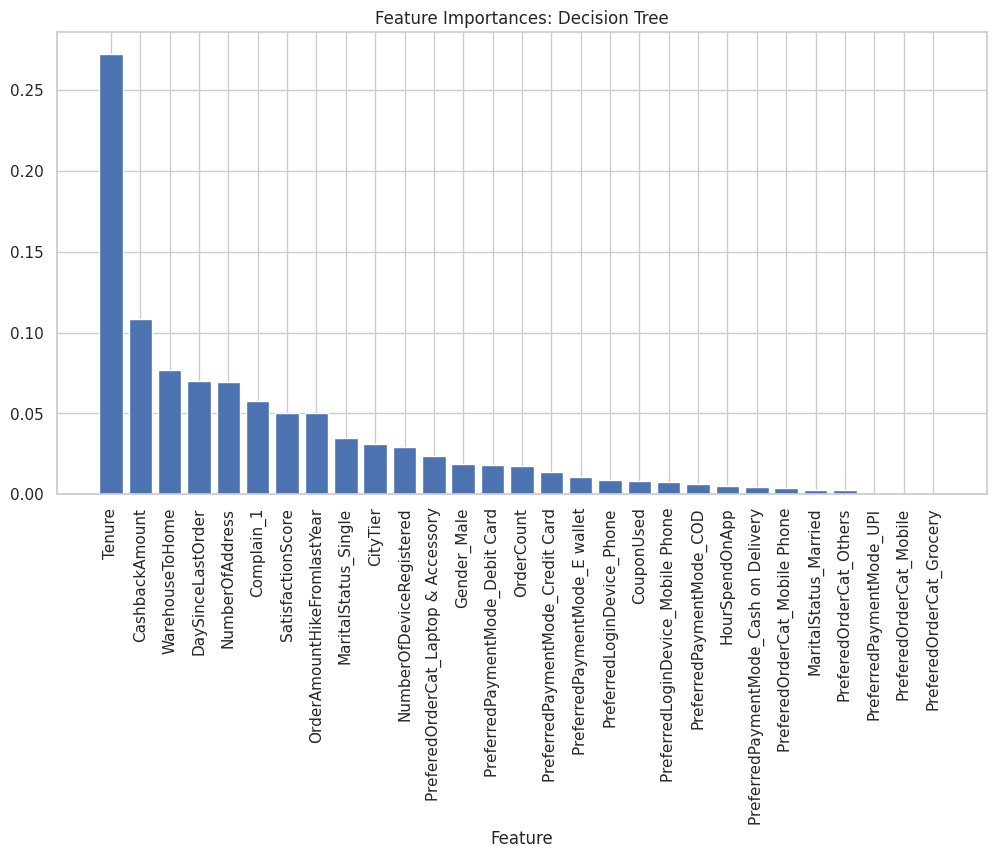

In [ ]:
importances = best_dt.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature importances for Decision Tree:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature: {X_train.columns[indices[f]]} Importance: {importances[indices[f]]}")

# Plotting
plt.figure(figsize=(12, 6))
plt.title("Feature Importances: Decision Tree")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.show()

**Decision Tree 2**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=1)

dt = DecisionTreeClassifier(random_state=1)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 17, 28],
    'min_samples_split': [3, 4, 19],
    'min_samples_leaf': [3, 5, 6],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_dt = grid_search.best_estimator_

y_pred = best_dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 17, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 3}
Accuracy:  0.9172413793103448
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       865
           1       0.70      0.76      0.73       150

    accuracy                           0.92      1015
   macro avg       0.83      0.85      0.84      1015
weighted avg       0.92      0.92      0.92      1015



According to the Decision Trees made above, Decision Tree 1 works the best with an accuracy of 94%. The best parameters for the decision tree that have been found till now are, 'criterion': 'entropy', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5.

The higher accuracy rate for non-churned and the lower accuracy for churn is due to the number of support data we have for each of them. If the data would have been the same for both, it would affect the accuracy scores significantly.

## Random Forest ##

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Creating the model
rf = RandomForestClassifier()

# Performing the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best accuracy:  0.9590835373224079


In [ ]:
# Using the best estimator to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Printing accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", accuracy)

# Printing classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Test set accuracy:  0.9733990147783251
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       865
           1       0.94      0.87      0.91       150

    accuracy                           0.97      1015
   macro avg       0.96      0.93      0.95      1015
weighted avg       0.97      0.97      0.97      1015



In [ ]:
random_forest = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
feature_names = data.drop(columns=['Churn_1']).columns

In [ ]:
feature_names

Index(['NumberOfDeviceRegistered', 'SatisfactionScore', 'Tenure',
       'WarehouseToHome', 'HourSpendOnApp', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'DaySinceLastOrder',
       'CityTier', 'OrderCount', 'CashbackAmount',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Complain_1'],
      dtype='object')

In [ ]:
X_train = pd.DataFrame(X_train, columns=feature_names)

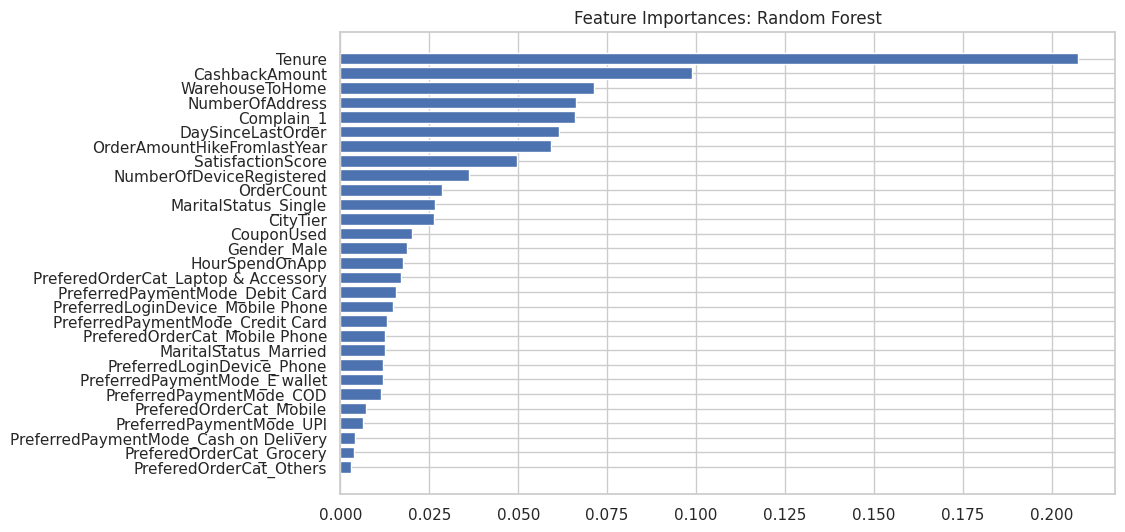

In [ ]:
def plot_feature_importances(model, X_train, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=1, n_jobs=2)
        importances = result.importances_mean

    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importances: {model_name}")
    plt.barh(range(X_train.shape[1]), importances[indices], align="center")
    plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
    plt.gca().invert_yaxis()
    plt.show()

plot_feature_importances(best_rf, X_train, 'Random Forest')

##Regression##

**Linear Regression**

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Mean Squared Error:  0.08454435171312026
R^2 Score:  0.3287113314554966


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



The linear regression model's performance is quantified by a Mean Squared Error (MSE) of 0.0845 and an R² score of 0.3287. The MSE indicates that, on average, the squared differences between the predicted and actual values are 0.0845, suggesting moderate prediction accuracy. The R² score reveals that the model explains approximately 32.87% of the variance in the target variable, leaving 67.13% of the variance unexplained by the model. This indicates that while the model captures some of the underlying patterns in the data, it is not particularly strong and may benefit from additional features or more complex modeling techniques to improve its predictive power.

#Logistic Regression#

**Full Regression**

In [ ]:
logreg = LogisticRegression(random_state=1)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.9113300492610837
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       865
           1       0.75      0.61      0.67       150

    accuracy                           0.91      1015
   macro avg       0.84      0.79      0.81      1015
weighted avg       0.91      0.91      0.91      1015



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Forward Regression**

In [ ]:
logreg = LogisticRegression(random_state=1, max_iter=10000)

In [ ]:
sfs = SequentialFeatureSelector(logreg, n_features_to_select='auto', direction='forward', cv=5)
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=10000,
                                                       random_state=1))

In [ ]:
selected_features = X_train.columns[sfs.get_support()].tolist()
print("Selected Features:", selected_features)

# Training the logistic regression model with the selected features
logreg_forward = LogisticRegression(random_state=1, max_iter=10000)
logreg_forward.fit(X_train[selected_features], y_train)

# Converting X_test to a DataFrame
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=X_train.columns)

# Predicting and evaluating
y_pred_forward = logreg_forward.predict(X_test[selected_features])
accuracy_forward = accuracy_score(y_test, y_pred_forward)

print("Forward Selection Accuracy: ", accuracy_forward)
print("Classification Report for Forward Selection:\n", classification_report(y_test, y_pred_forward))

Selected Features: ['NumberOfDeviceRegistered', 'Tenure', 'WarehouseToHome', 'NumberOfAddress', 'CouponUsed', 'DaySinceLastOrder', 'OrderCount', 'PreferredPaymentMode_COD', 'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Others', 'MaritalStatus_Single', 'Complain_1']
Forward Selection Accuracy:  0.9054187192118227
Classification Report for Forward Selection:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       865
           1       0.74      0.55      0.63       150

    accuracy                           0.91      1015
   macro avg       0.83      0.76      0.79      1015
weighted avg       0.90      0.91      0.90      1015



**Backward Regression**

In [ ]:
# Backward Selection using SequentialFeatureSelector
sfs_backward = SequentialFeatureSelector(logreg, n_features_to_select='auto', direction='backward', cv=5)
sfs_backward.fit(X_train, y_train)
selected_features_backward = X_train.columns[sfs_backward.get_support()].tolist()
print("Selected Features (Backward):", selected_features_backward)

# Training the logistic regression model with the selected features
logreg_backward = LogisticRegression(random_state=1, max_iter=10000)
logreg_backward.fit(X_train[selected_features_backward], y_train)

# Converting X_test to a DataFrame if it's not already
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=X_train.columns)

# Predicting and evaluating
y_pred_backward = logreg_backward.predict(X_test[selected_features_backward])
accuracy_backward = accuracy_score(y_test, y_pred_backward)

print("Backward Selection Accuracy: ", accuracy_backward)
print("Classification Report for Backward Selection:\n", classification_report(y_test, y_pred_backward))

Selected Features (Backward): ['NumberOfDeviceRegistered', 'SatisfactionScore', 'Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Phone', 'PreferredPaymentMode_COD', 'PreferredPaymentMode_E wallet', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone', 'MaritalStatus_Single', 'Complain_1']
Backward Selection Accuracy:  0.9103448275862069
Classification Report for Backward Selection:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       865
           1       0.76      0.58      0.66       150

    accuracy                           0.91      1015
   macro avg       0.84      0.77      0.80      1015
weighted avg       0.90      0.91      0.91      1015



**Stepwise Regression**

In [ ]:
# Forward Selection
sfs_forward = SequentialFeatureSelector(logreg, n_features_to_select='auto', direction='forward', cv=5)
sfs_forward.fit(X_train, y_train)
selected_features_forward = X_train.columns[sfs_forward.get_support()]

# Backward Selection
sfs_backward = SequentialFeatureSelector(logreg, n_features_to_select='auto', direction='backward', cv=5)
sfs_backward.fit(X_train, y_train)
selected_features_backward = X_train.columns[sfs_backward.get_support()]

# Combining features from forward and backward selections
selected_features_stepwise = list(set(selected_features_forward).union(set(selected_features_backward)))
print("Selected Features (Stepwise):", selected_features_stepwise)

# Training the logistic regression model with the selected features
logreg_stepwise = LogisticRegression(random_state=1, max_iter=10000)
logreg_stepwise.fit(X_train[selected_features_stepwise], y_train)

# Converting X_test to a DataFrame if it's not already
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=X_train.columns)

# Predicting and evaluating
y_pred_stepwise = logreg_stepwise.predict(X_test[selected_features_stepwise])
accuracy_stepwise = accuracy_score(y_test, y_pred_stepwise)

print("Stepwise Selection Accuracy: ", accuracy_stepwise)
print("Classification Report for Stepwise Selection:\n", classification_report(y_test, y_pred_stepwise))

Selected Features (Stepwise): ['WarehouseToHome', 'NumberOfAddress', 'PreferredPaymentMode_E wallet', 'OrderCount', 'CashbackAmount', 'MaritalStatus_Single', 'Complain_1', 'PreferedOrderCat_Laptop & Accessory', 'PreferredPaymentMode_COD', 'PreferedOrderCat_Mobile Phone', 'DaySinceLastOrder', 'Tenure', 'OrderAmountHikeFromlastYear', 'PreferredPaymentMode_UPI', 'CouponUsed', 'PreferredLoginDevice_Phone', 'NumberOfDeviceRegistered', 'PreferedOrderCat_Others', 'SatisfactionScore']
Stepwise Selection Accuracy:  0.9152709359605912
Classification Report for Stepwise Selection:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       865
           1       0.77      0.61      0.68       150

    accuracy                           0.92      1015
   macro avg       0.85      0.79      0.82      1015
weighted avg       0.91      0.92      0.91      1015



Feature importances for Stepwise Logistic Regression:
1. Feature: Tenure Coefficient: 1.264922250927881
2. Feature: Complain_1 Coefficient: 0.7353459573620936
3. Feature: NumberOfAddress Coefficient: 0.52285473044949
4. Feature: PreferedOrderCat_Laptop & Accessory Coefficient: 0.5118549796871781
5. Feature: DaySinceLastOrder Coefficient: 0.4541861341995799
6. Feature: MaritalStatus_Single Coefficient: 0.40686352149433574
7. Feature: OrderCount Coefficient: 0.35064118172213754
8. Feature: NumberOfDeviceRegistered Coefficient: 0.3013071534288984
9. Feature: PreferredPaymentMode_E wallet Coefficient: 0.29725947579654005
10. Feature: WarehouseToHome Coefficient: 0.2389830025062693
11. Feature: PreferredPaymentMode_COD Coefficient: 0.16727740181221032
12. Feature: PreferedOrderCat_Others Coefficient: 0.08040588598061653
13. Feature: CouponUsed Coefficient: 0.03337247831984758
14. Feature: PreferredPaymentMode_UPI Coefficient: 0.022515795322485484


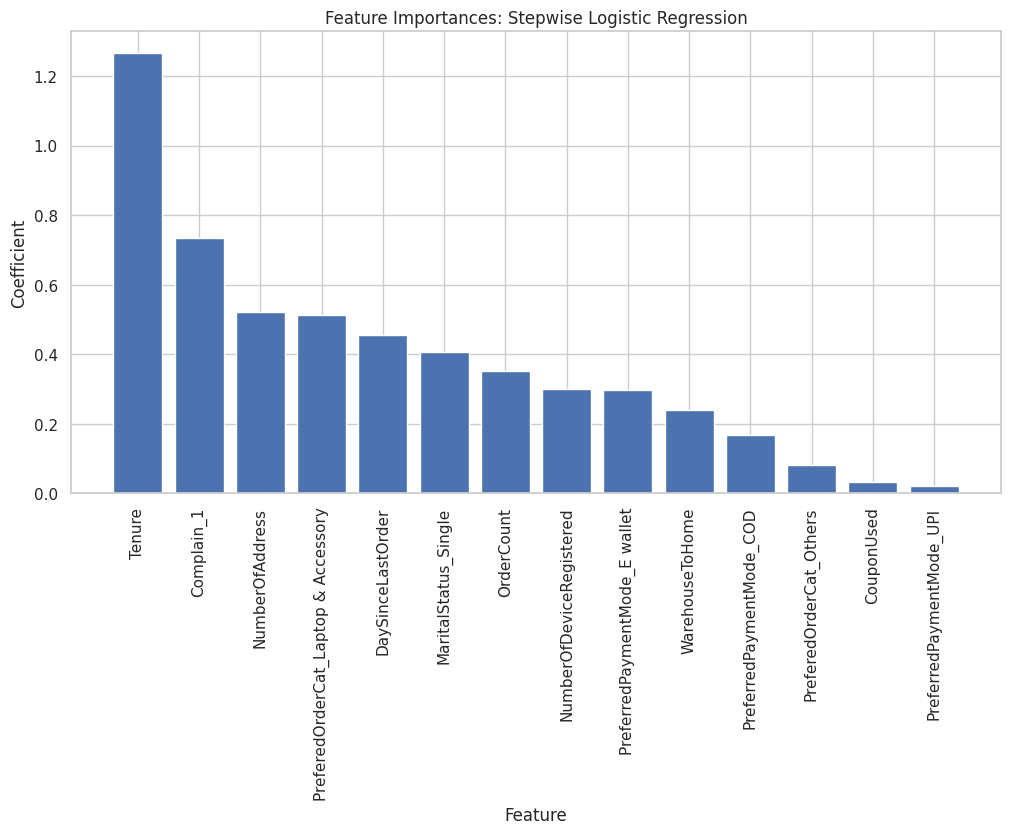

In [ ]:
coefficients = np.abs(logreg_forward.coef_[0])
indices = np.argsort(coefficients)[::-1]

print("Feature importances for Stepwise Logistic Regression:")
for f in range(len(selected_features)):
    print(f"{f + 1}. Feature: {selected_features[indices[f]]} Coefficient: {coefficients[indices[f]]}")

# Plotting
plt.figure(figsize=(12, 6))
plt.title("Feature Importances: Stepwise Logistic Regression")
plt.bar(range(len(selected_features)), coefficients[indices], align="center")
plt.xticks(range(len(selected_features)), [selected_features[i] for i in indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()

##Clustering##

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


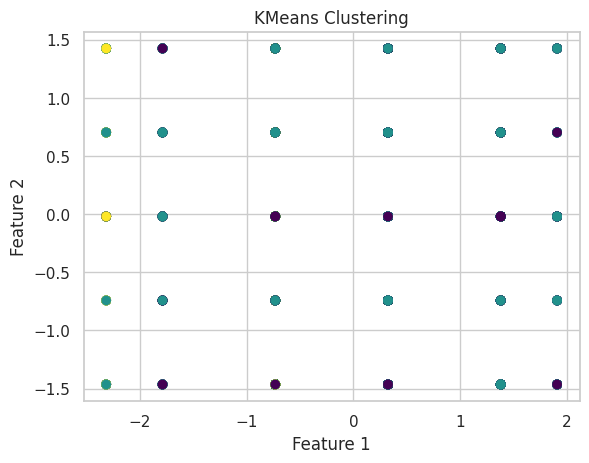

In [ ]:
from sklearn.cluster import KMeans

# Initializing the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fitting the model
kmeans.fit(X_standardized)

# Predicting the clusters
clusters = kmeans.predict(X_standardized)

# Plotting the results
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.show()

The scatter plot represents the results of a KMeans clustering algorithm applied to a dataset with two features. Each point on the plot corresponds to a data point, and the different colors indicate the clusters to which these points have been assigned. The clustering appears to segregate the data points into distinct groups based on their feature values. The plot suggests that the data is spread across the feature space in such a way that the clustering algorithm has identified three distinct clusters, as indicated by the presence of three different colors. This visualization helps in understanding how the data is grouped and the separability of the clusters formed by the KMeans algorithm.

##Support Vector Machine##

In [ ]:
from sklearn.svm import SVC

# Initializing the model
svm_model = SVC(kernel='linear', C=1, random_state=1)

# Fitting the model
svm_model.fit(X_train, y_train)

# Predicting
y_pred_svm = svm_model.predict(X_test)

# Accuracy and Classification Report
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("SVM Accuracy: ", accuracy_svm)
print("SVM Classification Report:\n", report_svm)

SVM Accuracy:  0.9133004926108375
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       865
           1       0.76      0.61      0.67       150

    accuracy                           0.91      1015
   macro avg       0.85      0.79      0.81      1015
weighted avg       0.91      0.91      0.91      1015



Feature importances for SVM (Permutation Importance):
1. Feature: Tenure Importance: 0.09330049261083745
2. Feature: Complain_1 Importance: 0.03586206896551723
3. Feature: NumberOfAddress Importance: 0.021182266009852225
4. Feature: PreferedOrderCat_Laptop & Accessory Importance: 0.016945812807881787
5. Feature: WarehouseToHome Importance: 0.009753694581280803
6. Feature: NumberOfDeviceRegistered Importance: 0.008965517241379306
7. Feature: SatisfactionScore Importance: 0.008571428571428586
8. Feature: CashbackAmount Importance: 0.008571428571428574
9. Feature: OrderCount Importance: 0.007290640394088688
10. Feature: PreferredPaymentMode_Debit Card Importance: 0.0068965517241379335
11. Feature: PreferredPaymentMode_E wallet Importance: 0.006502463054187191
12. Feature: DaySinceLastOrder Importance: 0.006108374384236459
13. Feature: CityTier Importance: 0.005714285714285727
14. Feature: MaritalStatus_Single Importance: 0.005615763546798025
15. Feature: PreferredPaymentMode_COD Importanc

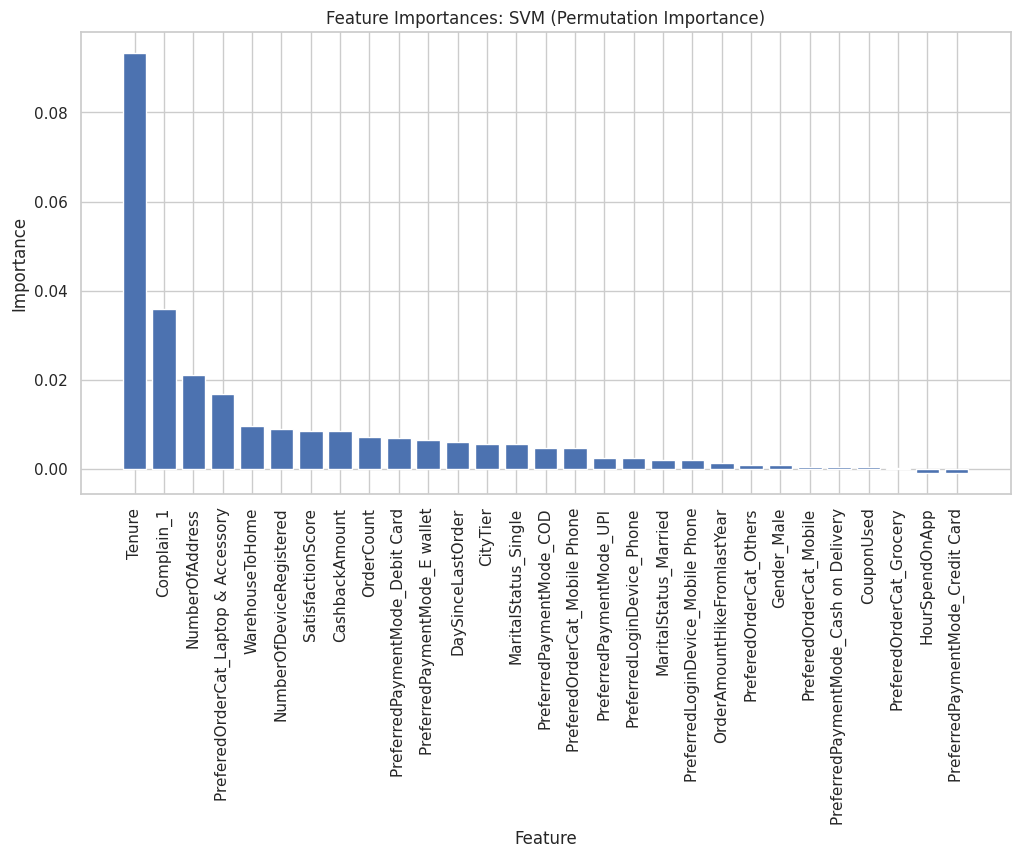

In [ ]:
result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature importances for SVM (Permutation Importance):")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature: {X_train.columns[indices[f]]} Importance: {importances[indices[f]]}")

# Plotting
plt.figure(figsize=(12, 6))
plt.title("Feature Importances: SVM (Permutation Importance)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

##Gradient Boosting Machine##

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initializing the model
gbm_model = GradientBoostingClassifier(random_state=1)

# Fitting the model
gbm_model.fit(X_train, y_train)

# Predicting
y_pred_gbm = gbm_model.predict(X_test)

# Accuracy and Classification Report
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
report_gbm = classification_report(y_test, y_pred_gbm)

print("GBM Accuracy: ", accuracy_gbm)
print("GBM Classification Report:\n", report_gbm)

GBM Accuracy:  0.9280788177339901
GBM Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       865
           1       0.82      0.66      0.73       150

    accuracy                           0.93      1015
   macro avg       0.88      0.82      0.84      1015
weighted avg       0.92      0.93      0.92      1015



Feature importances for Gradient Boosting Machine:
1. Feature: Tenure Importance: 0.44624379890363
2. Feature: Complain_1 Importance: 0.1350372339593873
3. Feature: CashbackAmount Importance: 0.09045635602798568
4. Feature: NumberOfAddress Importance: 0.07463047029530052
5. Feature: DaySinceLastOrder Importance: 0.04113686883725904
6. Feature: SatisfactionScore Importance: 0.029029998267380203
7. Feature: MaritalStatus_Single Importance: 0.028027439870348038
8. Feature: WarehouseToHome Importance: 0.026056098115819586
9. Feature: NumberOfDeviceRegistered Importance: 0.02601581016213031
10. Feature: CityTier Importance: 0.020226744328360784
11. Feature: PreferedOrderCat_Laptop & Accessory Importance: 0.01703673670459514
12. Feature: OrderCount Importance: 0.015812647361959607
13. Feature: PreferredPaymentMode_E wallet Importance: 0.011440977582477013
14. Feature: OrderAmountHikeFromlastYear Importance: 0.008941683734441068
15. Feature: MaritalStatus_Married Importance: 0.005684203117456

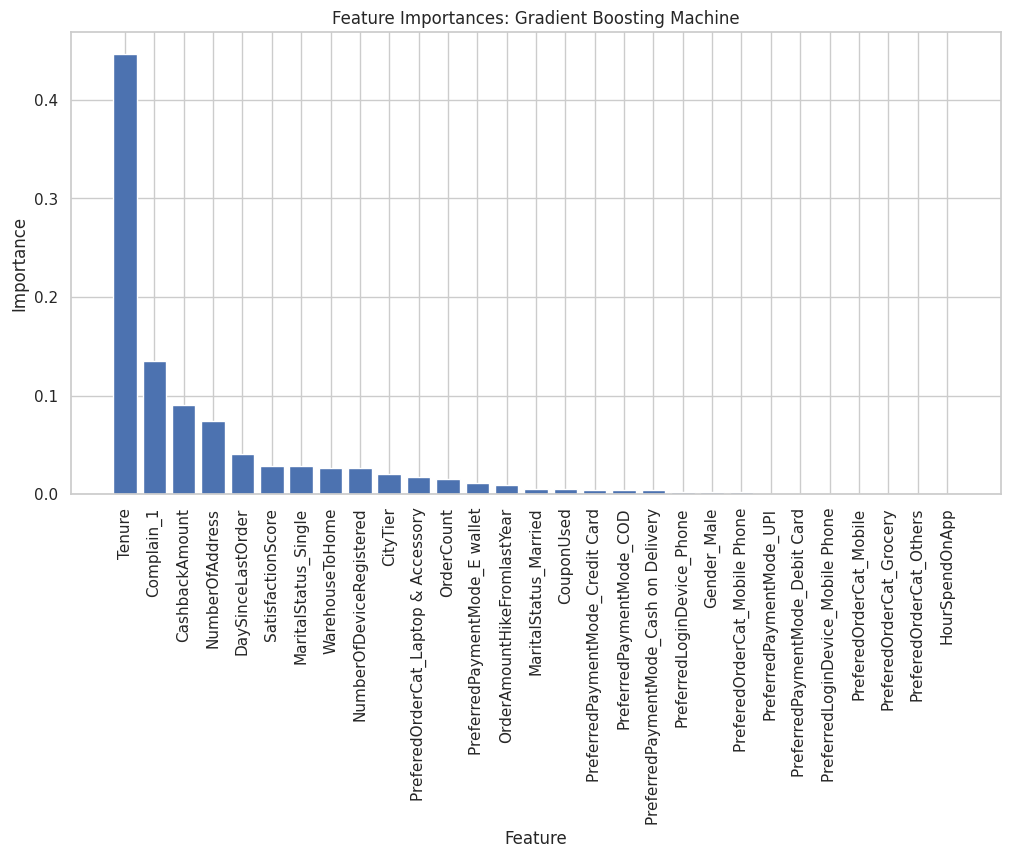

In [ ]:
importances = gbm_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature importances for Gradient Boosting Machine:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature: {X_train.columns[indices[f]]} Importance: {importances[indices[f]]}")

# Plotting
plt.figure(figsize=(12, 6))
plt.title("Feature Importances: Gradient Boosting Machine")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

##K-Nearest Neighbours (KNN)##

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initializing the model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fitting the model
knn_model.fit(X_train, y_train)

# Predicting
y_pred_knn = knn_model.predict(X_test)

# Accuracy and Classification Report
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print("KNN Accuracy: ", accuracy_knn)
print("KNN Classification Report:\n", report_knn)

KNN Accuracy:  0.9152709359605912
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       865
           1       0.81      0.55      0.66       150

    accuracy                           0.92      1015
   macro avg       0.87      0.77      0.81      1015
weighted avg       0.91      0.92      0.91      1015



Feature importances for KNN (Permutation Importance):
1. Feature: Tenure Importance: 0.03142857142857146
2. Feature: Complain_1 Importance: 0.019113300492610875
3. Feature: PreferredLoginDevice_Phone Importance: 0.01507389162561581
4. Feature: SatisfactionScore Importance: 0.014187192118226633
5. Feature: OrderCount Importance: 0.011822660098522198
6. Feature: NumberOfDeviceRegistered Importance: 0.010935960591133054
7. Feature: DaySinceLastOrder Importance: 0.01034482758620694
8. Feature: NumberOfAddress Importance: 0.009753694581280826
9. Feature: PreferedOrderCat_Laptop & Accessory Importance: 0.009655172413793146
10. Feature: MaritalStatus_Single Importance: 0.009556650246305443
11. Feature: WarehouseToHome Importance: 0.00896551724137935
12. Feature: Gender_Male Importance: 0.008669950738916299
13. Feature: OrderAmountHikeFromlastYear Importance: 0.007783251231527122
14. Feature: PreferredLoginDevice_Mobile Phone Importance: 0.00729064039408871
15. Feature: PreferedOrderCat_Grocer

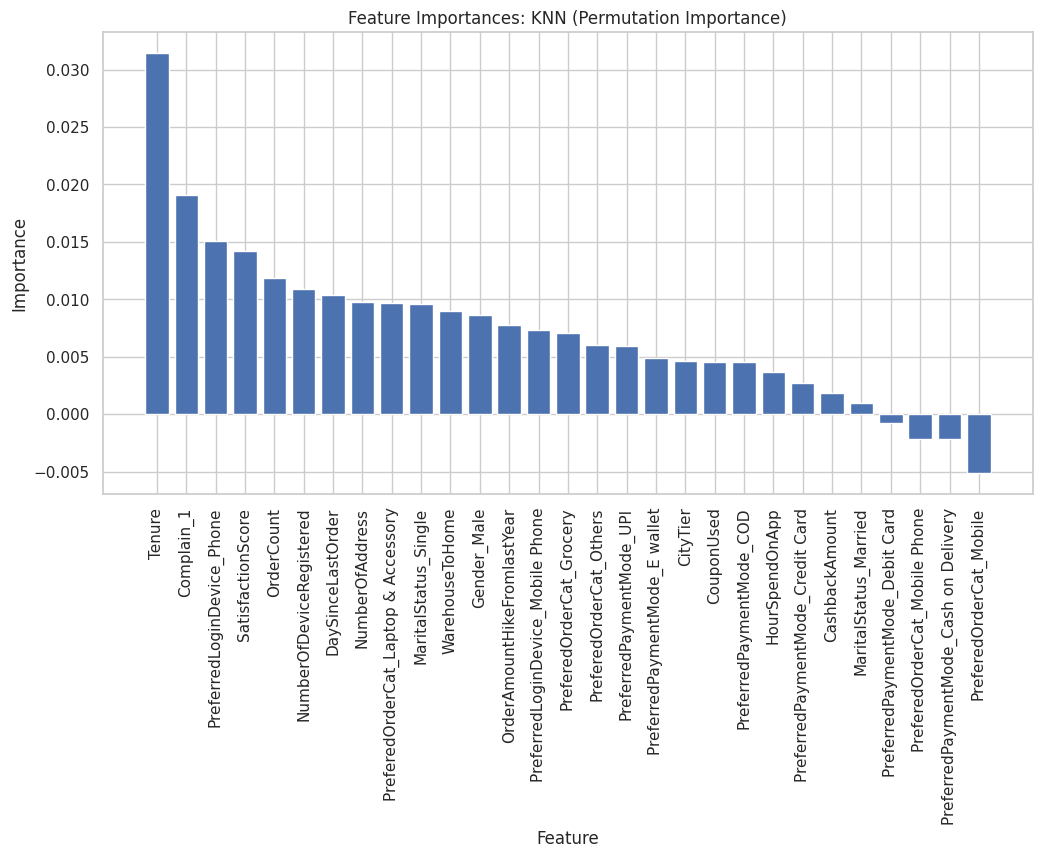

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature importances for KNN (Permutation Importance):")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature: {X_train.columns[indices[f]]} Importance: {importances[indices[f]]}")

# Plotting
plt.figure(figsize=(12, 6))
plt.title("Feature Importances: KNN (Permutation Importance)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

##Neural Network##

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initializing the model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=1)

# Fitting the model
nn_model.fit(X_train, y_train)

# Predicting
y_pred_nn = nn_model.predict(X_test)

# Accuracy and Classification Report
accuracy_nn = accuracy_score(y_test, y_pred_nn)
report_nn = classification_report(y_test, y_pred_nn)

print("Neural Network Accuracy: ", accuracy_nn)
print("Neural Network Classification Report:\n", report_nn)

Neural Network Accuracy:  0.9684729064039409
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       865
           1       0.90      0.88      0.89       150

    accuracy                           0.97      1015
   macro avg       0.94      0.93      0.94      1015
weighted avg       0.97      0.97      0.97      1015



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Feature importances for Neural Network:
1. Feature: NumberOfAddress Importance: 0.3194532924218493
2. Feature: OrderAmountHikeFromlastYear Importance: 0.2988250095304576
3. Feature: Tenure Importance: 0.29247946817236536
4. Feature: Complain_1 Importance: 0.2863918266989025
5. Feature: SatisfactionScore Importance: 0.2842329960093576
6. Feature: PreferredLoginDevice_Phone Importance: 0.28059328025832747
7. Feature: MaritalStatus_Single Importance: 0.276117445032145
8. Feature: Gender_Male Importance: 0.27547388069176626
9. Feature: CityTier Importance: 0.2739034970515806
10. Feature: PreferredPaymentMode_E wallet Importance: 0.2714569884414683
11. Feature: PreferredPaymentMode_COD Importance: 0.26913208442657804
12. Feature: NumberOfDeviceRegistered Importance: 0.2672894327622813
13. Feature: PreferedOrderCat_Laptop & Accessory Importance: 0.26686329035795286
14. Feature: PreferedOrderCat_Grocery Importance: 0.2655864619771828
15. Feature: CashbackAmount Importance: 0.2654094734529179


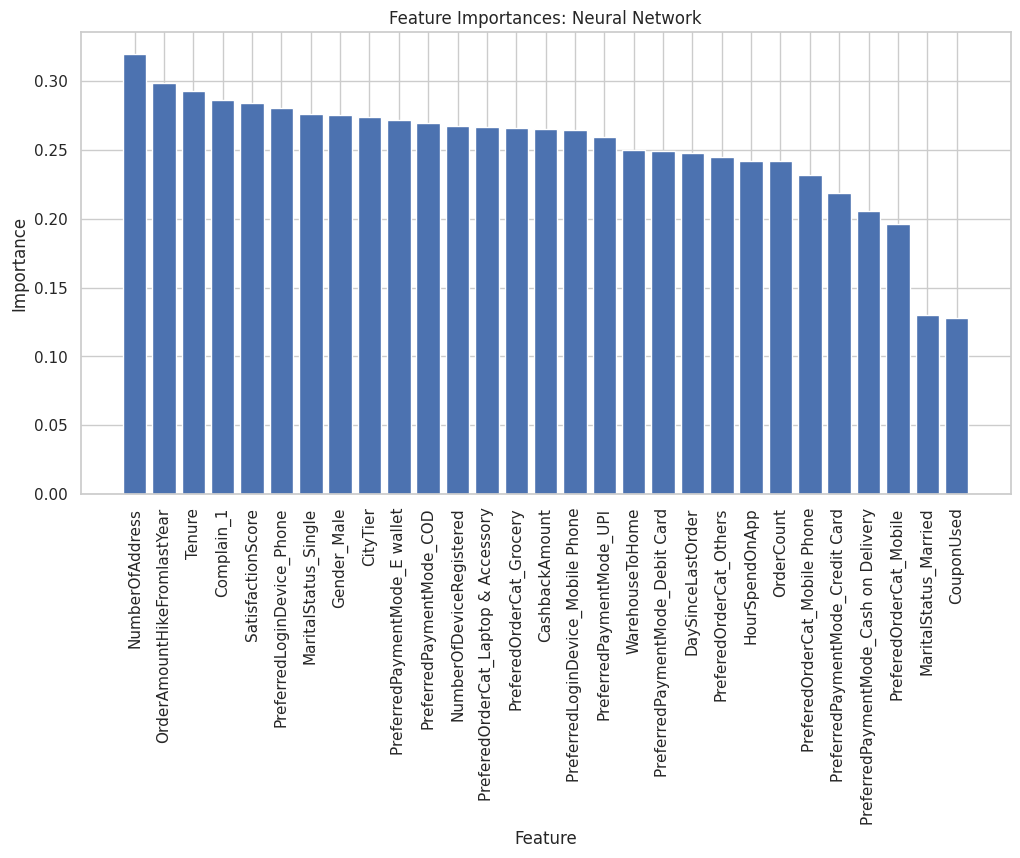

In [ ]:
# Assume the neural network is trained with input layer weights available
input_weights = nn_model.coefs_[0]

# Take the mean of the absolute values of the weights across all neurons
importances = np.mean(np.abs(input_weights), axis=1)
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature importances for Neural Network:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature: {X_train.columns[indices[f]]} Importance: {importances[indices[f]]}")

# Plotting
plt.figure(figsize=(12, 6))
plt.title("Feature Importances: Neural Network")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

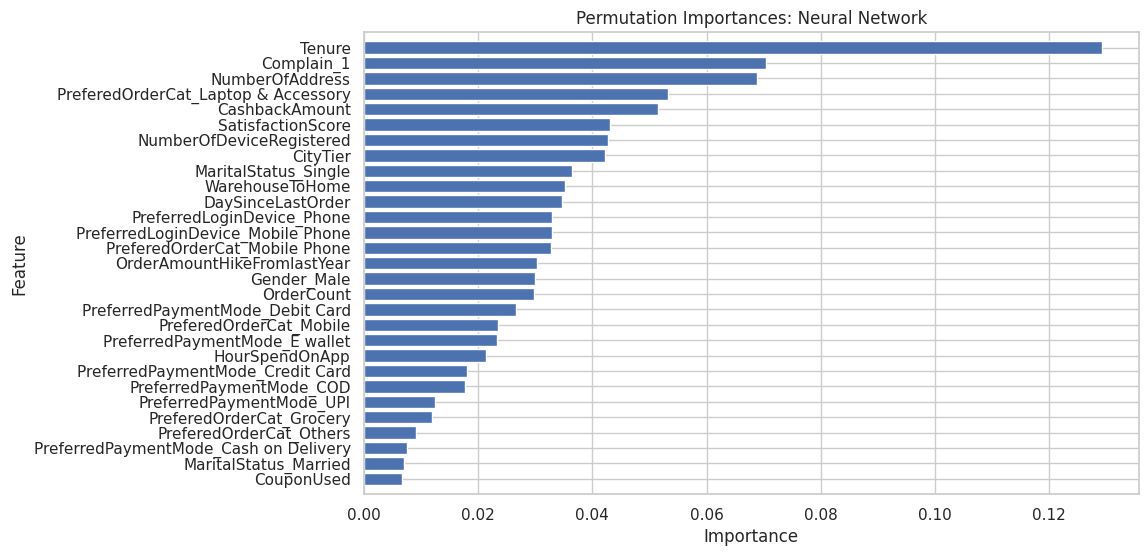

In [ ]:
def plot_permutation_importances(model, X_train, y_train, model_name):
    result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)
    importances = result.importances_mean
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(f"Permutation Importances: {model_name}")
    plt.barh(range(X_train.shape[1]), importances[indices], align="center")
    plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
    plt.ylim([-1, X_train.shape[1]])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.gca().invert_yaxis()  # Invert y axis to have the most important feature on top
    plt.show()

# Example usage for Neural Network
plot_permutation_importances(nn_model, X_train, y_train, 'Neural Network')

##Model Comparison##

Evaluating Decision Tree...
Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy for Decision Tree: 0.9277266754270697
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1263
           1       0.85      0.70      0.77       259

    accuracy                           0.93      1522
   macro avg       0.90      0.84      0.86      1522
weighted avg       0.92      0.93      0.92      1522


Evaluating Random Forest...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Random Forest: 0.9520367936925098
Classification Report for Random Forest:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for Neural Network: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy for Neural Network: 0.9316688567674113
Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1263
           1       0.82      0.76      0.79       259

    accuracy                           0.93      1522
   macro avg       0.89      0.87      0.88      1522
weighted avg       0.93      0.93      0.93      1522


Summary of Model Comparison:
Decision Tree:
  Accuracy: 0.9277266754270697
  Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1263
           1       0.85      0.70      0.77       259

    accuracy                           0.93      1522
   macro avg       0.90      0.84      0.86      1522
weighted avg       0.92      0.93      0.92      1522


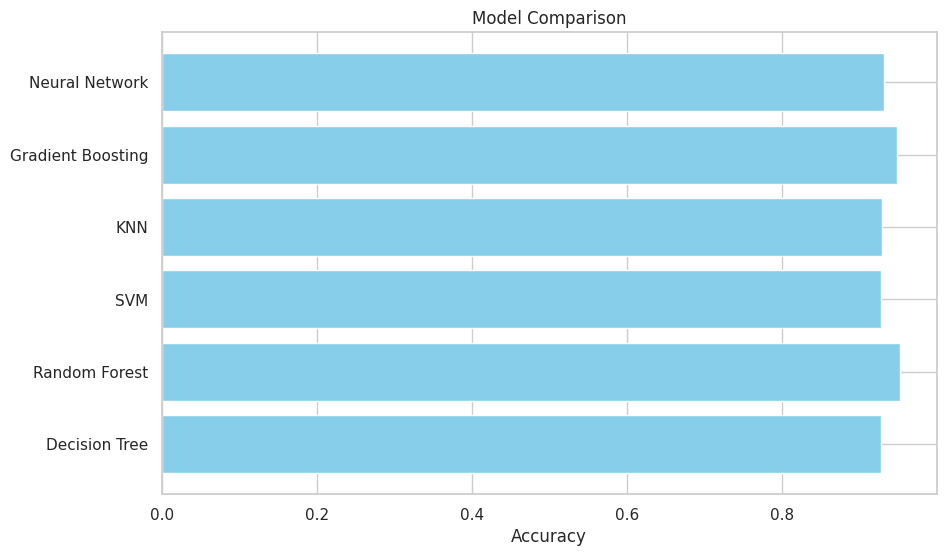

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(random_state=1),
    "SVM": SVC(random_state=1),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1),
    "Neural Network": MLPClassifier(random_state=1)
}

# Define parameter grids for GridSearchCV
param_grids = {
    "Decision Tree": {
            'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15 , 30, 45],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 9],
    'max_features': [None, 'sqrt', 'log2']
    },

    "Random Forest": {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2']
    },

    "SVM": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'degree': [3, 4, 5]
    },

    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    },
    "Neural Network": {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }
}

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to fit and evaluate models
def evaluate_model(model_name, model, param_grid):
    print(f"Evaluating {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Accuracy for {model_name}: {accuracy}")
    print(f"Classification Report for {model_name}:\n{report}\n")
    return model_name, accuracy, report

# Store the results
results = []

# Evaluate all models
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    results.append(evaluate_model(model_name, model, param_grid))

# Print summary of results
print("Summary of Model Comparison:")
for model_name, accuracy, report in results:
    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Classification Report:\n{report}")

# Optional: Visualize the results (accuracy comparison)
import matplotlib.pyplot as plt

# Extract model names and accuracies
model_names = [result[0] for result in results]
accuracies = [result[1] for result in results]

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.show()

The Random Forest and Gradient Boosting models exhibit the highest accuracy, outperforming the other models, including the Decision Tree. This suggests that these ensemble methods are better suited for the classification task at hand, as they can handle complex patterns and interactions within the data more effectively. Random Forest and Gradient Boosting also demonstrate higher precision, recall, and F1-scores, especially for the minority class (Class 1). Given these results, focusing on Random Forest and Neural Network for predictive modeling will likely yield more accurate and reliable outcomes, making them the preferred choices for decision-making processes.

##ROC Charts##

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


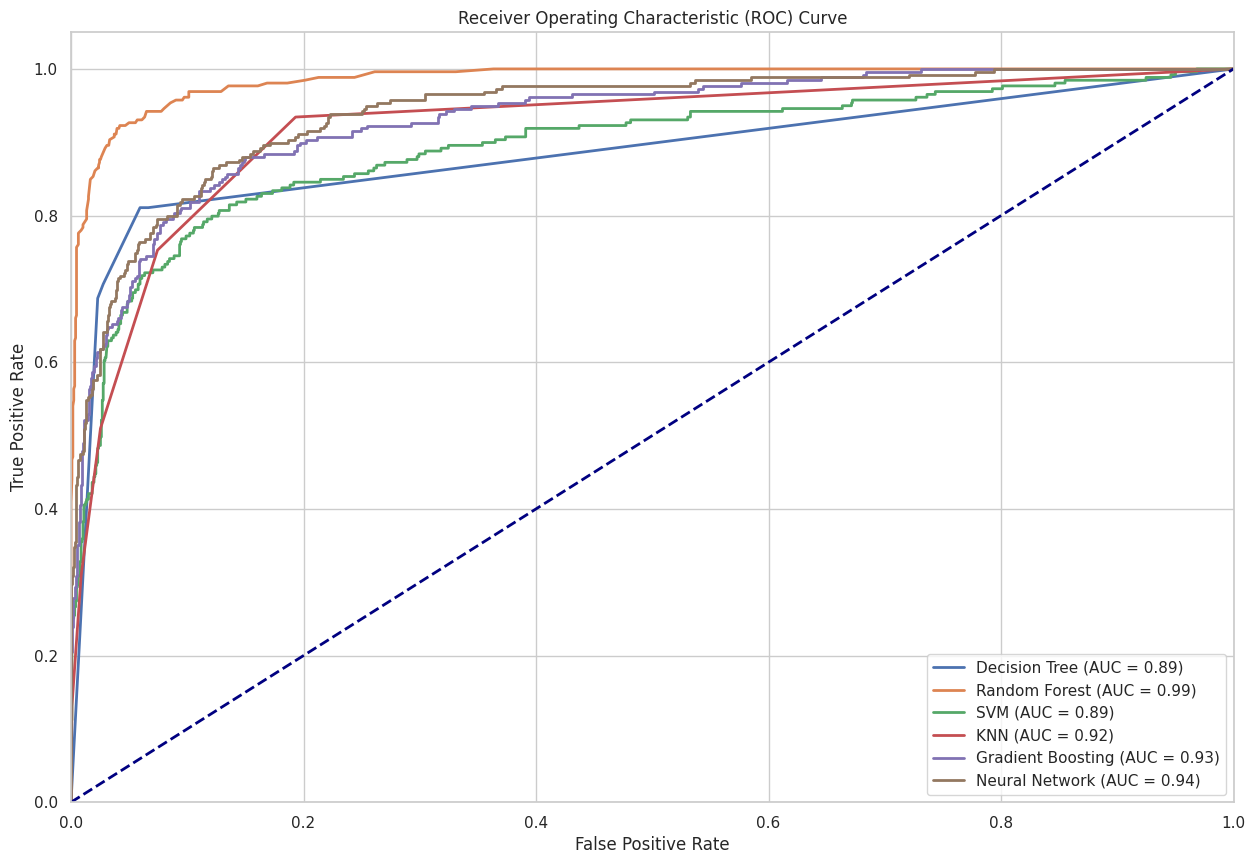

In [ ]:
from sklearn.metrics import roc_curve, auc

# Define the models
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=2)
random_forest = RandomForestClassifier(n_estimators=200, random_state=1)
svm = SVC(probability=True, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5)
gradient_boosting = GradientBoostingClassifier(random_state=1)
neural_network = MLPClassifier(random_state=1)

# Train the models
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
neural_network.fit(X_train, y_train)

# Store the models in a dictionary for easy iteration
models = {
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'SVM': svm,
    'KNN': knn,
    'Gradient Boosting': gradient_boosting,
    'Neural Network': neural_network
}

# Plot ROC curves
plt.figure(figsize=(15, 10))

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Based on the ROC curves and AUC values displayed in the chart, we can draw several conclusions about the performance of each model:

**Random Forest**:

AUC: 0.99
This model has the highest AUC, indicating excellent performance in distinguishing between classes. It is likely the best model in this comparison.

**Neural Network**:

AUC: 0.94
This model also performs very well, with a high AUC, making it a strong candidate for accurate classification.

**Gradient Boosting**:

AUC: 0.93
Another strong performer, with a slightly lower AUC than the neural network but still indicating high classification accuracy.

**K-Nearest Neighbors (KNN)**:

AUC: 0.92
KNN shows good performance, although it is not as strong as the top three models.

**Decision Tree**:

AUC: 0.89
The decision tree model has a good AUC but is outperformed by random forest, gradient boosting, and neural network models.

**Support Vector Machine (SVM)**:

AUC: 0.89
SVM has the same AUC as the decision tree, indicating similar performance.

**Interpretation and Recommendations**:
Random Forest is the top-performing model based on the AUC value, suggesting it has the best overall ability to discriminate between the classes.
Neural Network and Gradient Boosting also show excellent performance and could be considered as strong alternatives.

Models like KNN, Decision Tree, and SVM perform well but are not as effective as the top three models.

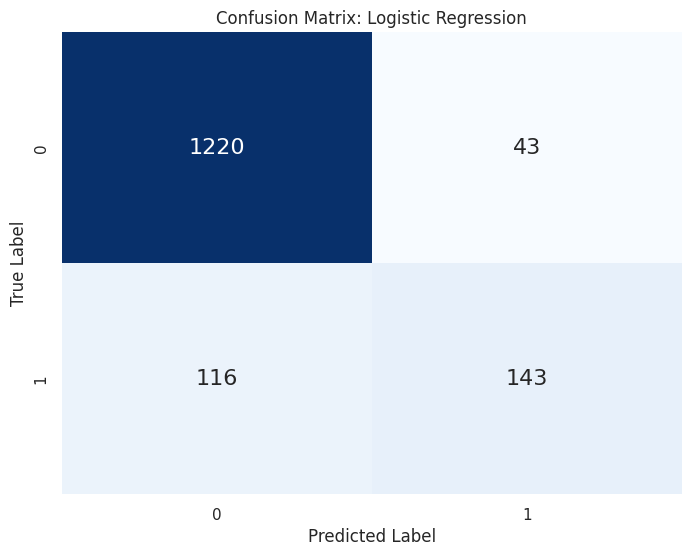

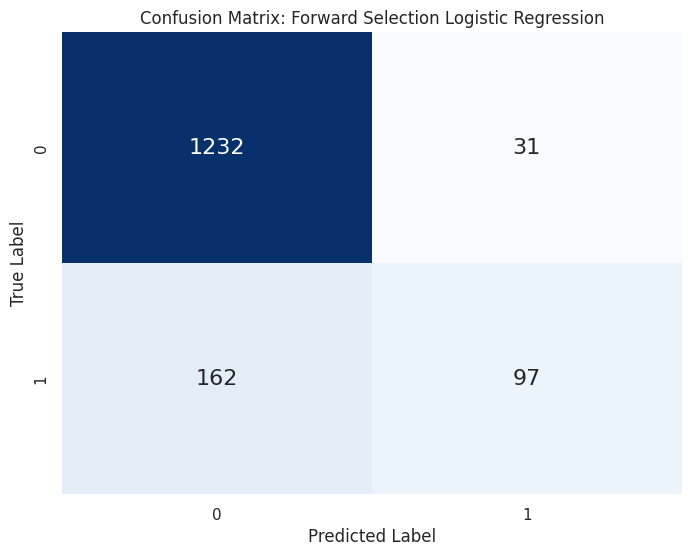

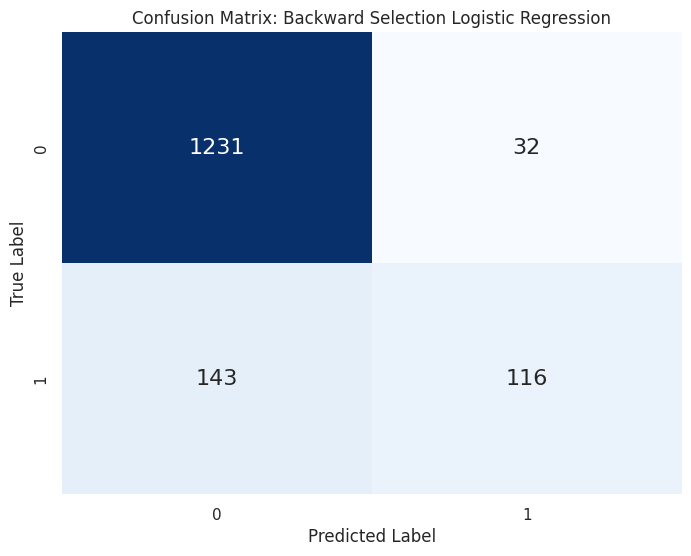

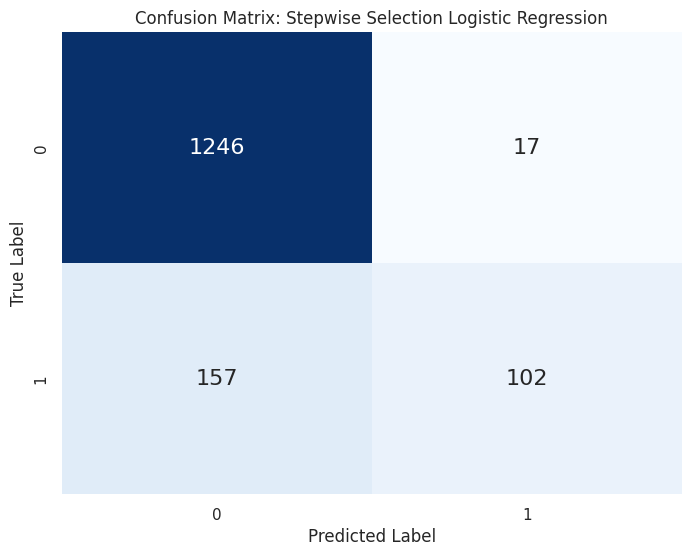

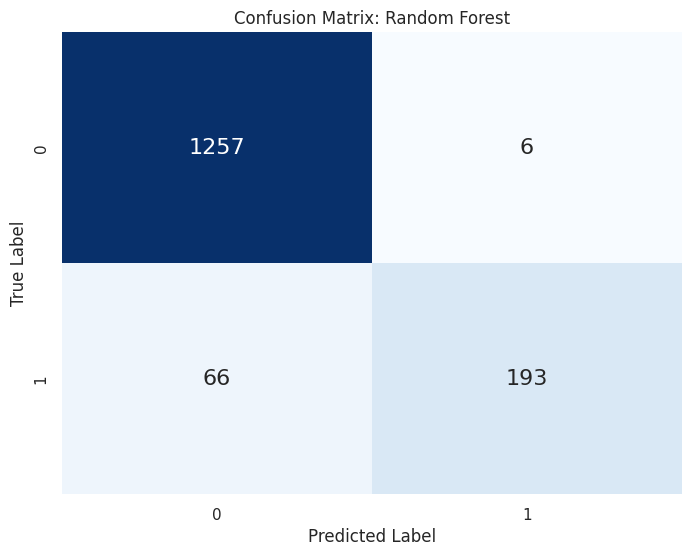

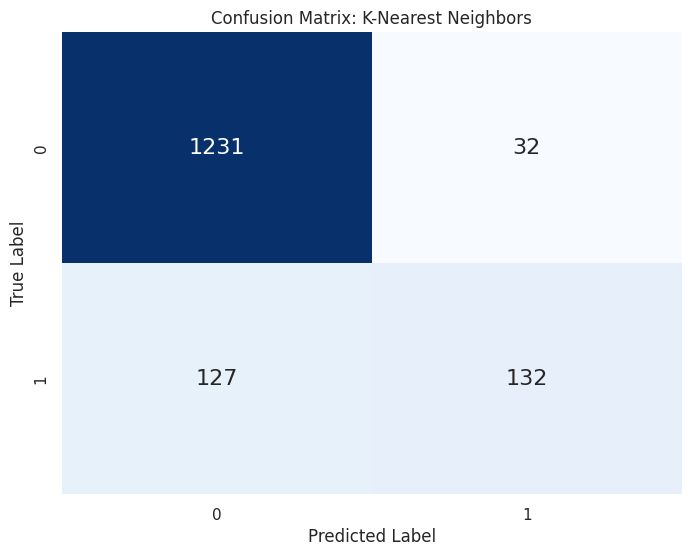

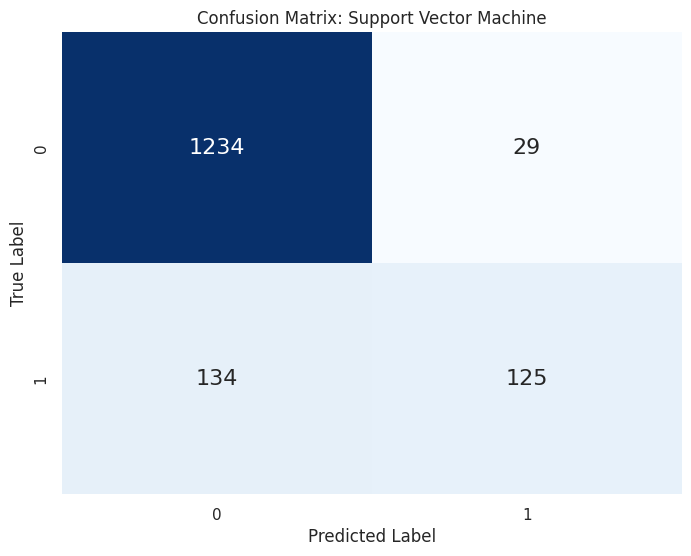

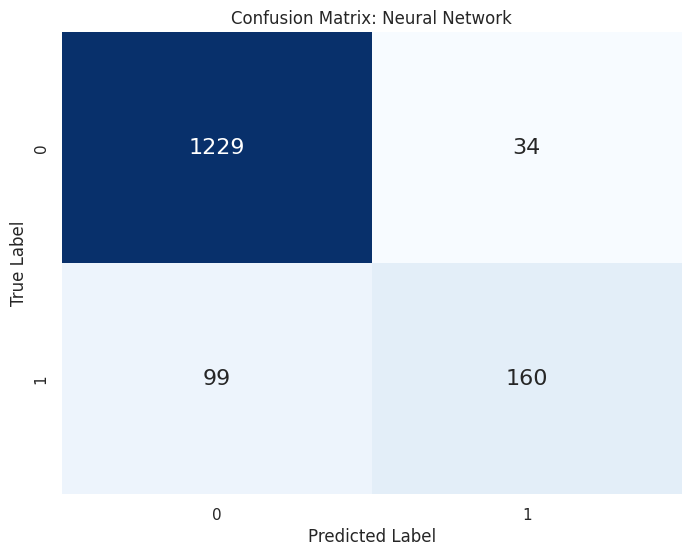

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Example usage with multiple models
# Logistic Regression

logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
plot_confusion_matrix(y_test, y_pred_logreg, "Logistic Regression")

# Forward Selection Logistic Regression
y_pred_forward = logreg_forward.predict(X_test[selected_features])
plot_confusion_matrix(y_test, y_pred_forward, "Forward Selection Logistic Regression")

# Backward Selection Logistic Regression
y_pred_backward = logreg_backward.predict(X_test[logreg_backward.feature_names_in_])
plot_confusion_matrix(y_test, y_pred_backward, "Backward Selection Logistic Regression")

# Stepwise Selection Logistic Regression
y_pred_stepwise = logreg_stepwise.predict(X_test[logreg_stepwise.feature_names_in_])
plot_confusion_matrix(y_test, y_pred_stepwise, "Stepwise Selection Logistic Regression")

# Random Forest
y_pred_rf = random_forest.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# K-Nearest Neighbors
y_pred_knn = knn.predict(X_test)
plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")

# Support Vector Machine
y_pred_svm = svm.predict(X_test)
plot_confusion_matrix(y_test, y_pred_svm, "Support Vector Machine")

# Neural Network
y_pred_nn = neural_network.predict(X_test)
plot_confusion_matrix(y_test, y_pred_nn, "Neural Network")